# This is breast cancer classification project
**Information about data can be found in "SEER Breast Cancer Dataset.pdf" file**

### Analysis is divided in several parts:
* [Data reading and cleaning](#Data-reading-and-cleaning)
* [EDA + Visualizations](#EDA-+-Visualizations)
* [Models](#Models)

In [94]:
# some base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# additional imports
import sys
first_steps_path = r"..\utils\common_utils"
if first_steps_path not in sys.path:
    sys.path.append(first_steps_path)
from first_steps import first_descriptions
# some basic settings
pd.set_option('display.max_columns', 100)

plt.style.use('seaborn-v0_8-deep')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data reading and cleaning

In [95]:
cancer_raw_data = pd.read_csv("SEER Breast Cancer Dataset .csv")
# there are mistake in data, so it has fully-nulled column, so we drop it
cancer_raw_data = cancer_raw_data.drop('Unnamed: 3', axis = 1)

In [96]:
first_descriptions(cancer_raw_zdata)

************************************************* Dataset first description **************************************************
****************************************************** Head of dataset *******************************************************


Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status T Stage  N Stage 6th Stage  \
0  Married (including common law)       T2      N3      IIIC   
1  Married (including common law)       T2      N2      IIIA   
2  Married (including common law)       T2      N1       IIB   
3                        Divorced       T1      N1       IIA   
4  Married (including common law)       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      19                     11   
1            Positive                      25                      9   
2            Positive                       4                      1   
3            Positive                      26                      1   
4            Positive                      21                      5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

*************************************************** Pandas-Generated info ****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-

None

************************************************ Categorical features unique *************************************************
Race 
['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black'] 

Marital Status
['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated'] 

T Stage 
['T2' 'T1' 'T3' 'T4'] 

N Stage
['N3' 'N2' 'N1'] 

6th Stage
['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB'] 

Grade
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'] 

A Stage
['Regional' 'Distant'] 

Estrogen Status
['Positive' 'Negative'] 

Progesterone Status
['Positive' 'Negative'] 

Status
['Alive' 'Dead'] 

****************************************************** Dublicate check *******************************************************
Number of dublicates is : 1
********************************************************* NaN check ******************************************

### Data cleaning plan:
* **Seems like we have single dublicate, we'll delete it**  
* **Some categorical features can be transformed in 0 or 1**  
* **We'll separate data from target column** 
* **Columns need some renaming**
* **Some categorical features need better naming e.g. stage names can be shorten**

In [4]:
# drop dublicates
cancer_raw_data = cancer_raw_data.drop_duplicates()
assert cancer_raw_data.duplicated().sum() == 0

In [5]:
# boolean columns transform
boolean_columns = [
    'Estrogen Status',
    'Progesterone Status'
]
for column in boolean_columns:
    cancer_raw_data[column] = pd.to_numeric(cancer_raw_data[column].apply(lambda x: 1 if x=='Positive' else 0))

In [6]:
# target transform
target = pd.to_numeric(cancer_raw_data['Status'].apply(lambda x: 1 if x=='Dead' else 0))
cancer_raw_data['Status'] = pd.to_numeric(cancer_raw_data['Status'].apply(lambda x: 1 if x=='Dead' else 0))

In [7]:
# columns renaming
cancer_raw_data.columns = [
    'age',
    'race',
    'mariage',
    't_stage',
    'n_stage',
    'sixth_stage',
    'grade',
    'a_stage',
    'tumor_size',
    'estrogen_status',
    'progesterone_status',
    'regional_node_examined',
    'regional_node_positive',
    'survival_month',
    'status'
]

# cat values renaming
cancer_raw_data.race = cancer_raw_data.race.apply(
    lambda x: "Other" if x=='Other (American Indian/AK Native, Asian/Pacific Islander)' else x
)

cancer_raw_data.mariage = cancer_raw_data.mariage.apply(
    lambda x: "Married" if x == 'Married (including common law)' 
    else "Single" if x == 'Single (never married)' else x
)

cancer_raw_data.grade = cancer_raw_data.grade.apply(
    lambda x: 
    "I" if x=='Well differentiated; Grade I' else
    "II" if x=='Moderately differentiated; Grade II' else
    "III" if x=='Poorly differentiated; Grade III' else
    "IV" if x=='Undifferentiated; anaplastic; Grade IV' else x
)

In [8]:
cancer_data = cancer_raw_data.copy()

# EDA + Visualizations

### First check distribution of target

In [9]:
target.value_counts()

0    3407
1     616
Name: Status, dtype: int64

**Looks like we have unbalanced classes  
In that case we'll learn and apply some techniques to fix it further on in modeling**

### Let's plot feature distributions

In [10]:
numerical_features = [
    'age',
    'tumor_size',
    'regional_node_examined',
    'regional_node_positive',
    'survival_month',
]
categorical_features = [
    'race',
    'mariage',
    't_stage',
    'n_stage',
    'sixth_stage',
    'grade',
    'a_stage',
    'estrogen_status',
    'progesterone_status',
]
print(len(categorical_features))
print(len(numerical_features))

9
5


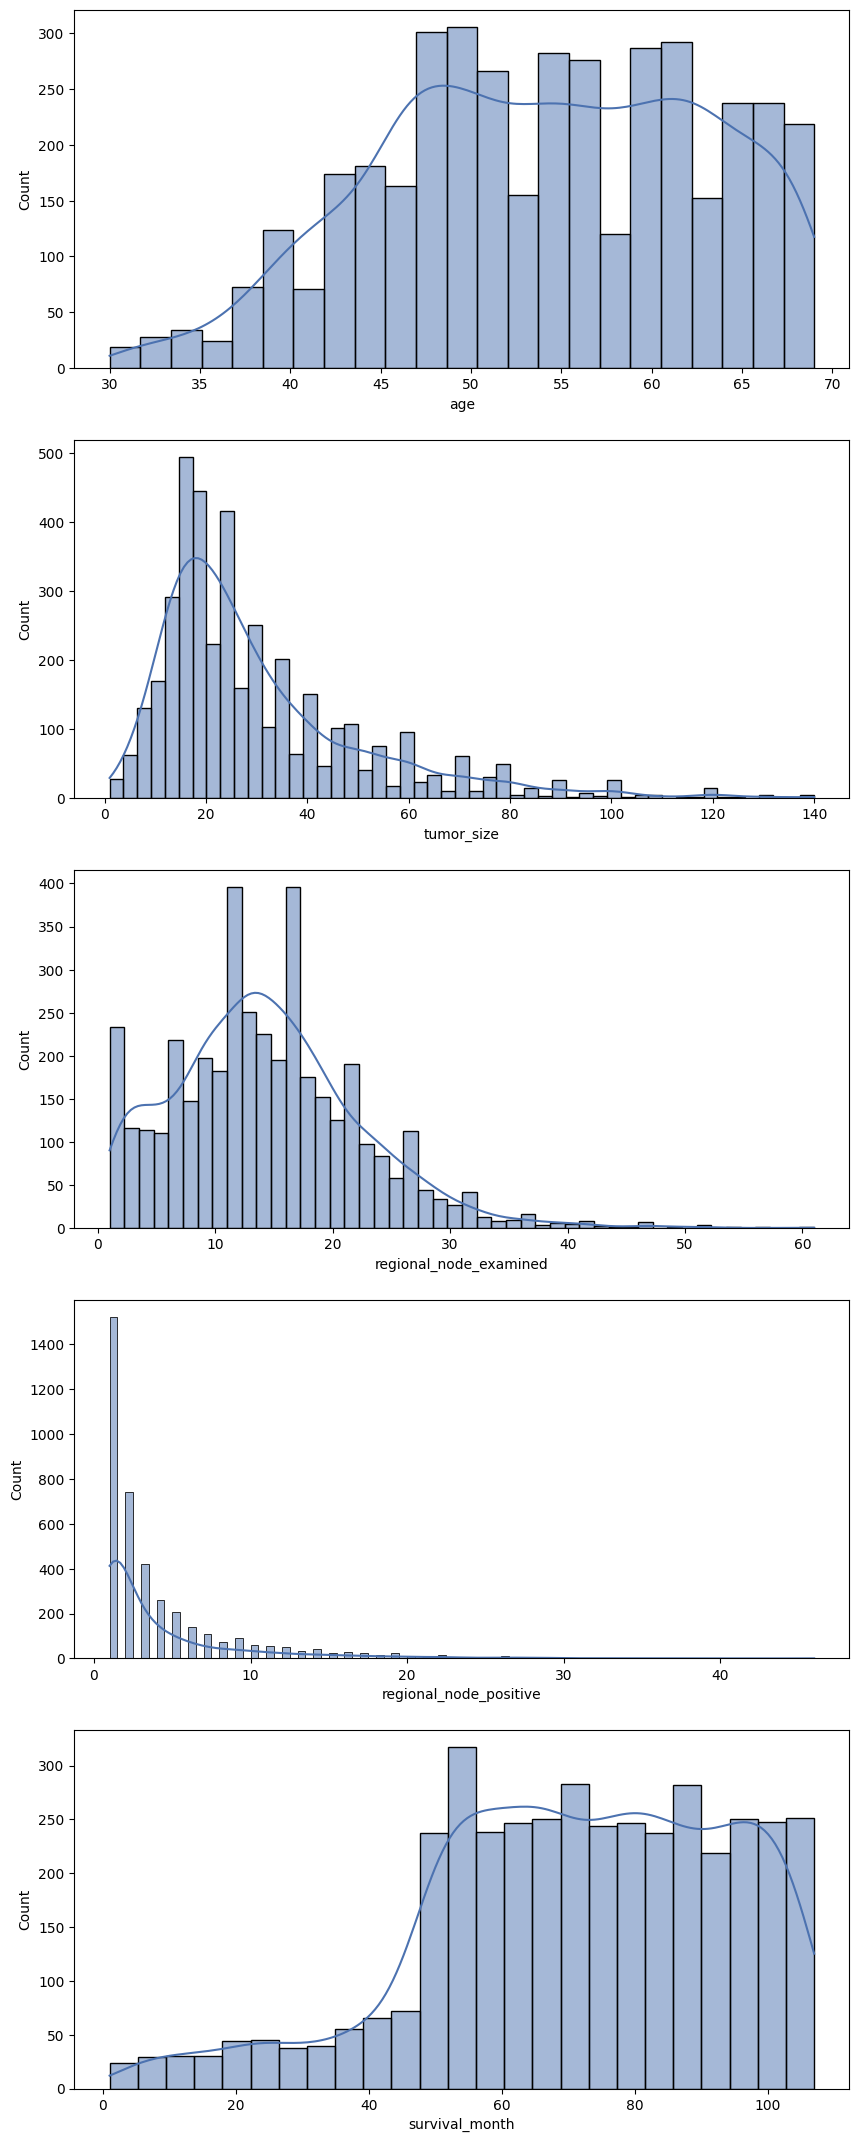

In [11]:
fig, ax = plt.subplots(5, 1, figsize=(10,27))
for i, axs in enumerate(ax.flatten()):
    sns.histplot(cancer_data[numerical_features[i]], ax=axs, kde=True)

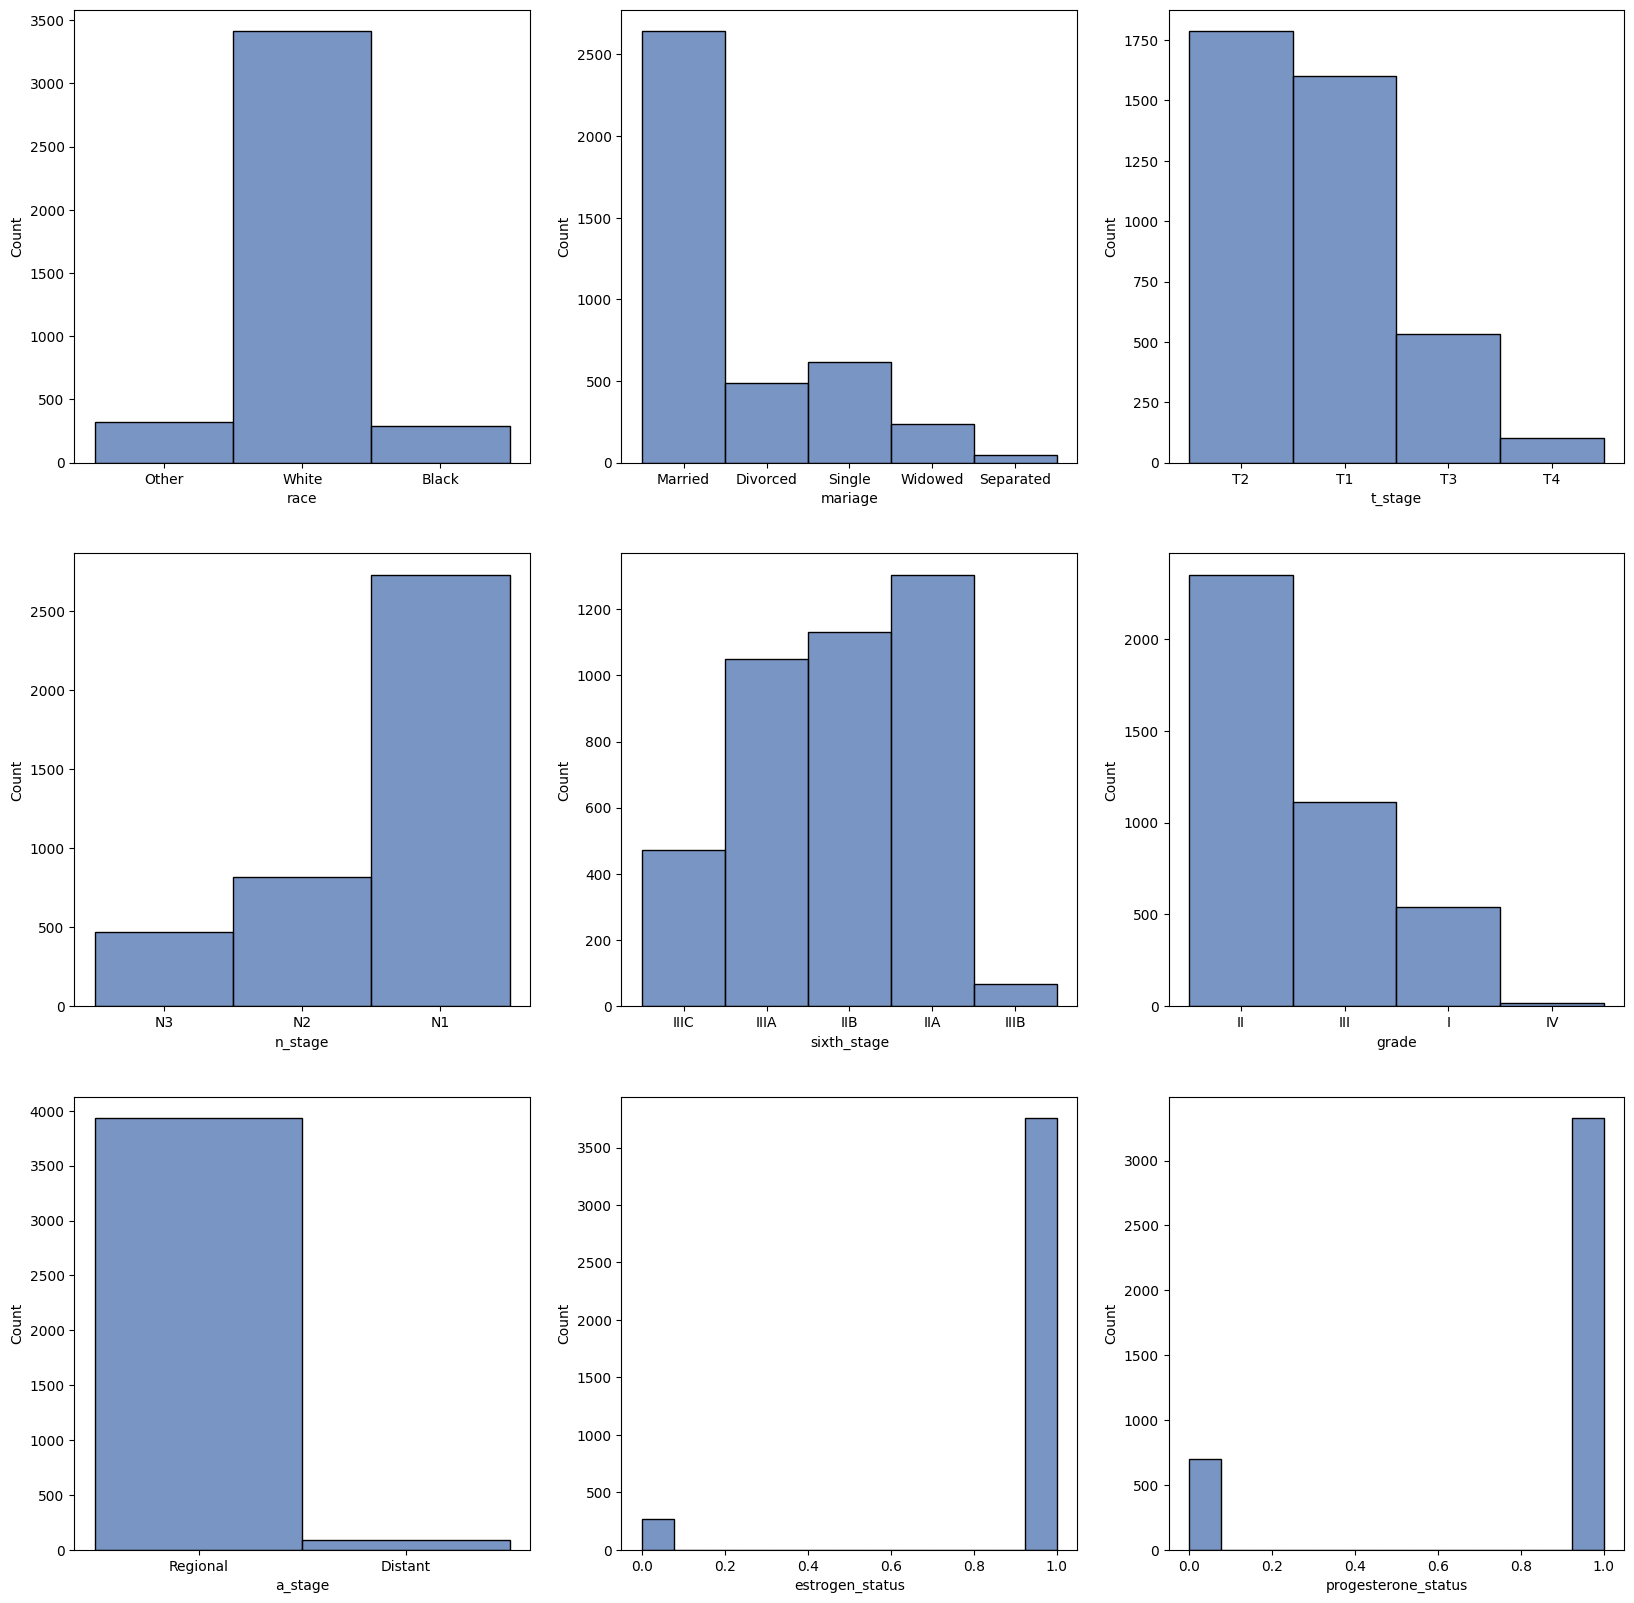

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
for i, axs in enumerate(ax.flatten()):
    sns.histplot(cancer_data[categorical_features[i]], ax=axs)

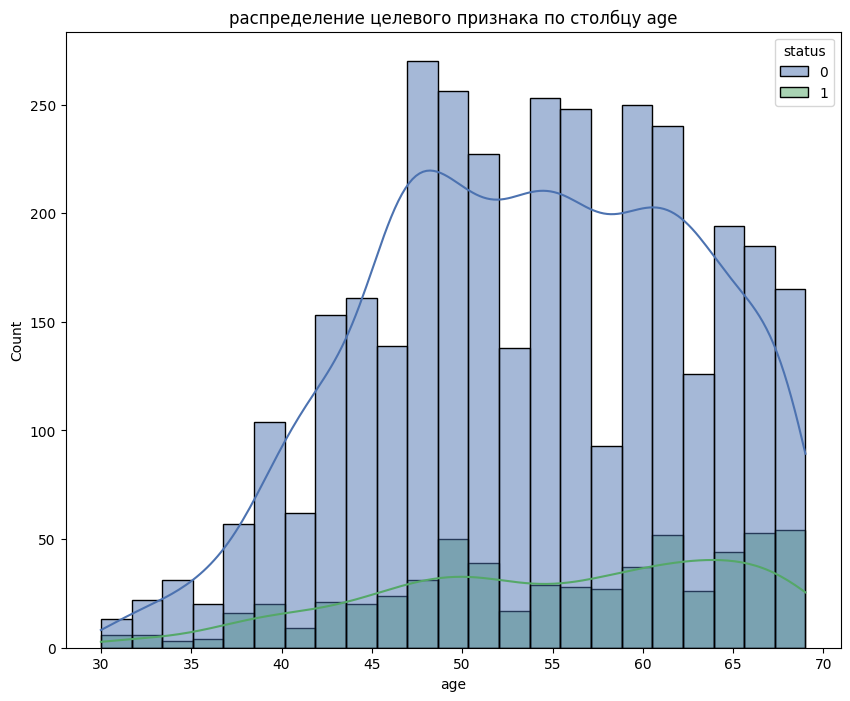

Описательные статистики по столбцу age в зависимости от статуса


count       mean       std   min   25%   50%   75%   max
status                                                           
0       3407.0  53.756384  8.808290  30.0  47.0  54.0  61.0  69.0
1        616.0  55.150974  9.698291  30.0  48.0  56.5  63.0  69.0

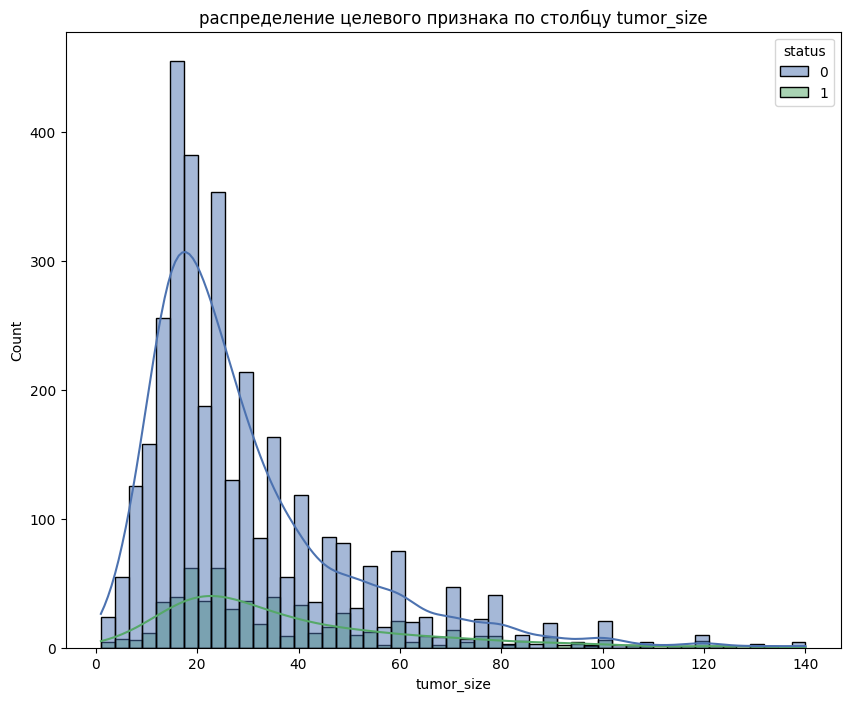

Описательные статистики по столбцу tumor_size в зависимости от статуса


count      mean        std  min   25%   50%   75%    max
status                                                           
0       3407.0  29.27238  20.305066  1.0  15.0  23.0  35.0  140.0
1        616.0  37.13961  24.116115  1.0  20.0  30.0  50.0  140.0

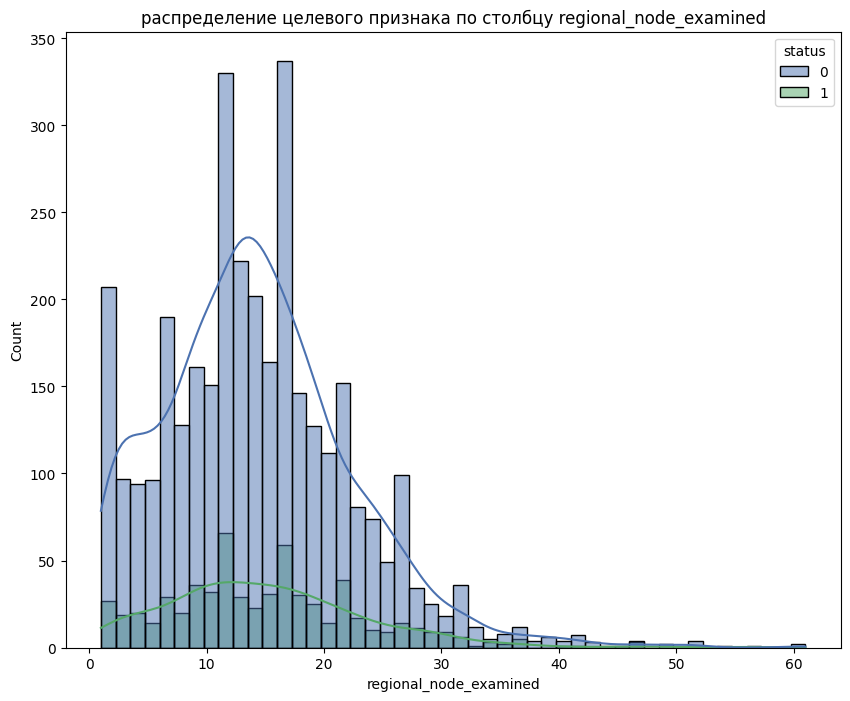

Описательные статистики по столбцу regional_node_examined в зависимости от статуса


count       mean       std  min  25%   50%   75%   max
status                                                         
0       3407.0  14.238920  8.023884  1.0  9.0  14.0  19.0  61.0
1        616.0  15.019481  8.486600  1.0  9.0  14.0  20.0  57.0

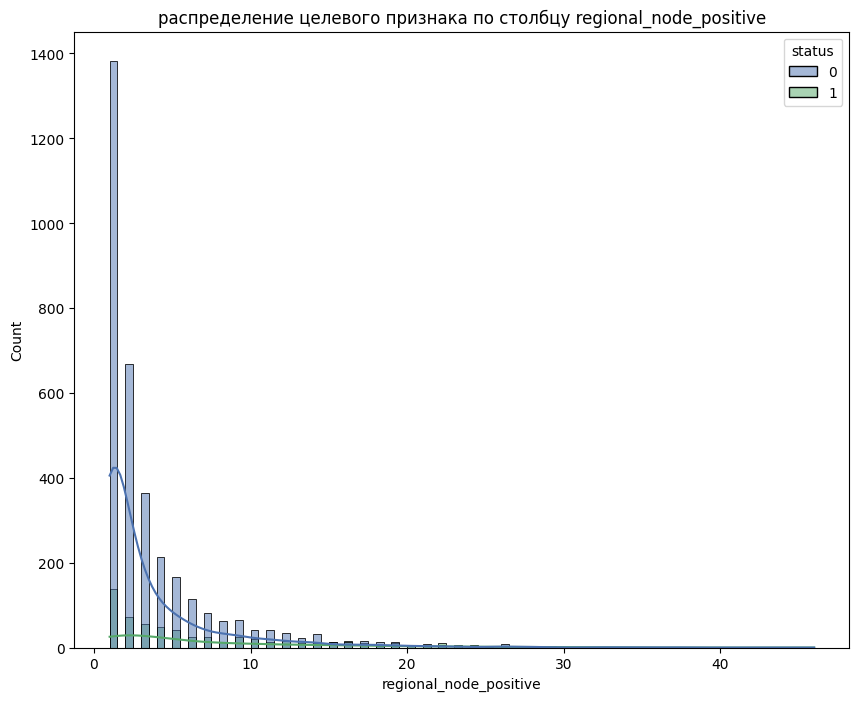

Описательные статистики по столбцу regional_node_positive в зависимости от статуса


count      mean       std  min  25%  50%   75%   max
status                                                       
0       3407.0  3.601409  4.375595  1.0  1.0  2.0   4.0  41.0
1        616.0  7.241883  7.312642  1.0  2.0  4.0  10.0  46.0

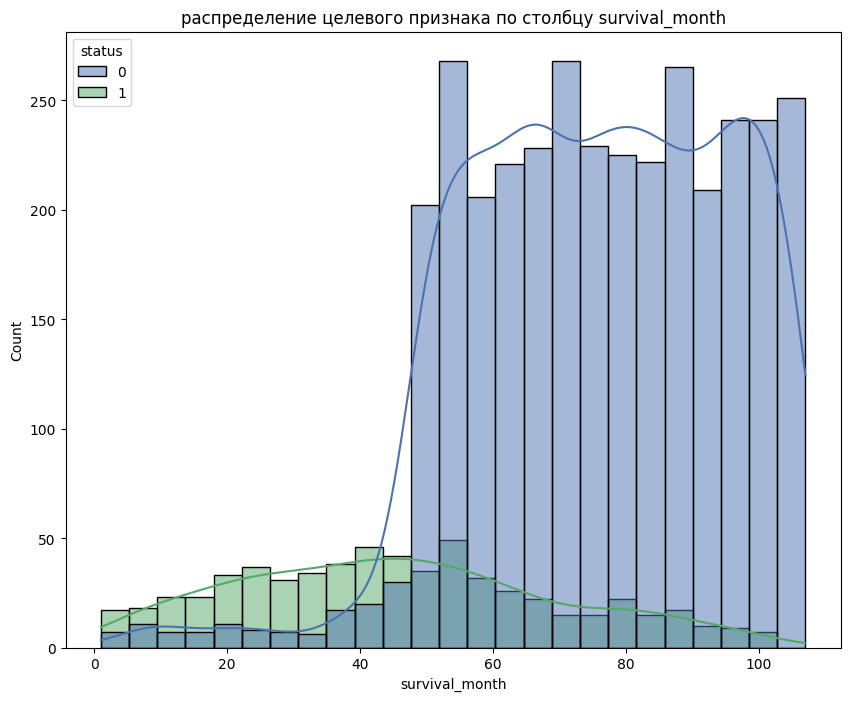

Описательные статистики по столбцу survival_month в зависимости от статуса


count       mean        std  min   25%   50%   75%    max
status                                                            
0       3407.0  75.946874  19.386293  1.0  61.0  77.0  92.0  107.0
1        616.0  45.610390  23.966253  2.0  27.0  44.0  61.0  102.0

In [13]:
for i, feature in enumerate(numerical_features):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.histplot(
        data=cancer_data, 
        x=feature, 
        ax=ax, 
        hue='status',
        kde=True
    )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Описательные статистики по столбцу {feature} в зависимости от статуса")
    display(
        cancer_data.groupby('status')[feature].describe()
    )

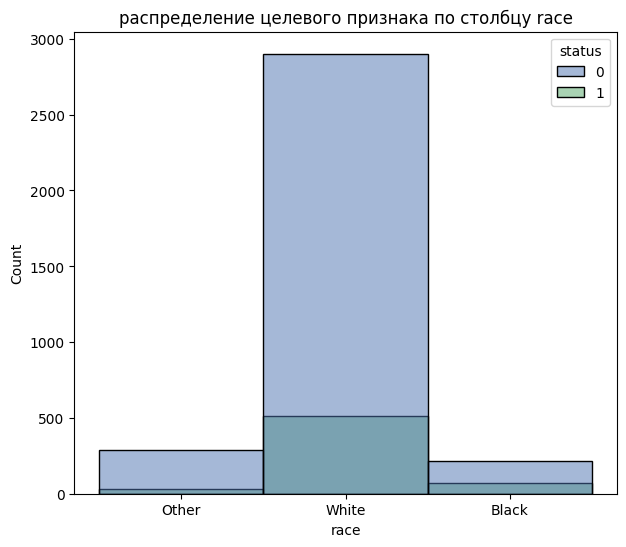

Распределение целевой пременной в зависимости от race


race   status
Black  0          218
       1           73
Other  0          287
       1           33
White  0         2902
       1          510
Name: status, dtype: int64

Распределение целевой пременной в зависимости от race в процентах


race   status
Black  0         0.749141
       1         0.250859
Other  0         0.896875
       1         0.103125
White  0         0.850528
       1         0.149472
Name: status, dtype: float64

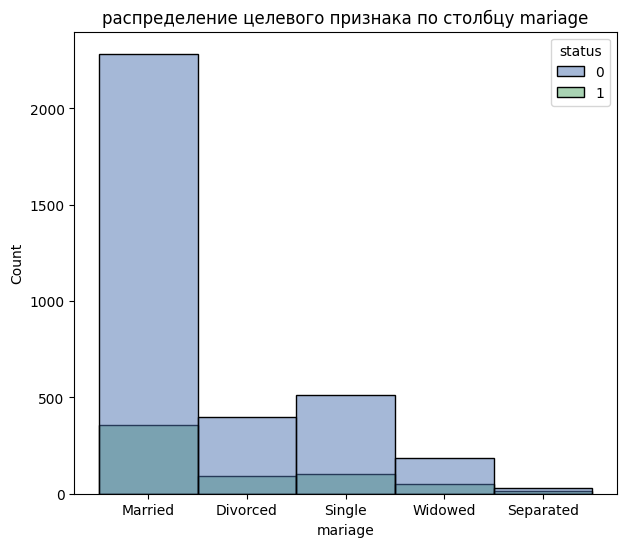

Распределение целевой пременной в зависимости от mariage


mariage    status
Divorced   0          396
           1           90
Married    0         2284
           1          358
Separated  0           30
           1           15
Single     0          511
           1          104
Widowed    0          186
           1           49
Name: status, dtype: int64

Распределение целевой пременной в зависимости от mariage в процентах


mariage    status
Divorced   0         0.814815
           1         0.185185
Married    0         0.864497
           1         0.135503
Separated  0         0.666667
           1         0.333333
Single     0         0.830894
           1         0.169106
Widowed    0         0.791489
           1         0.208511
Name: status, dtype: float64

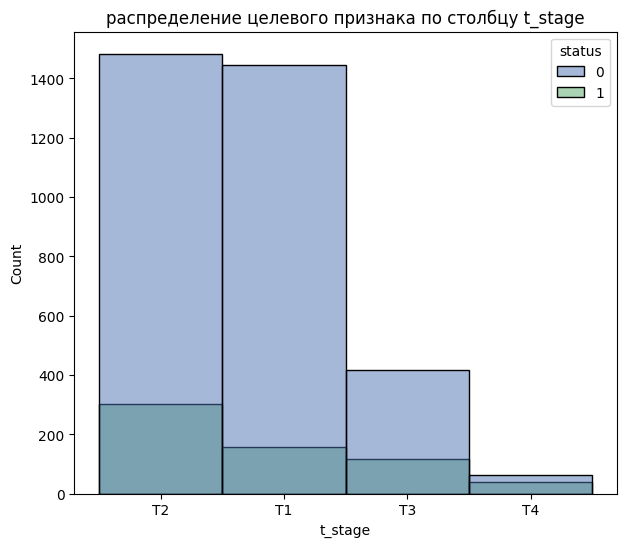

Распределение целевой пременной в зависимости от t_stage


t_stage  status
T1       0         1445
         1          157
T2       0         1483
         1          303
T3       0          417
         1          116
T4       0           62
         1           40
Name: status, dtype: int64

Распределение целевой пременной в зависимости от t_stage в процентах


t_stage  status
T1       0         0.901998
         1         0.098002
T2       0         0.830347
         1         0.169653
T3       0         0.782364
         1         0.217636
T4       0         0.607843
         1         0.392157
Name: status, dtype: float64

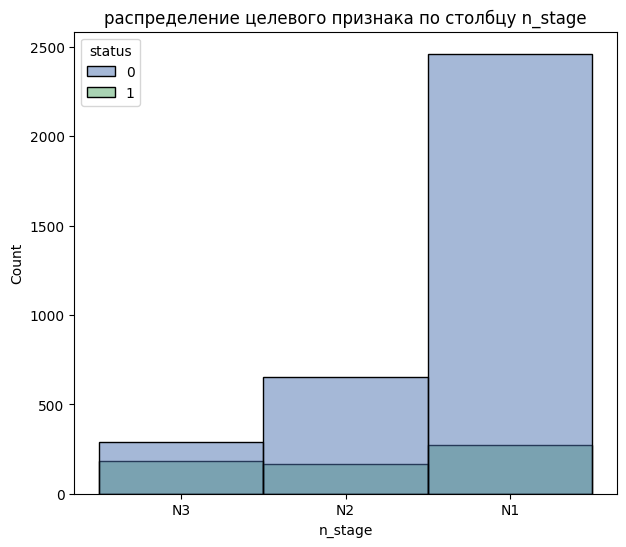

Распределение целевой пременной в зависимости от n_stage


n_stage  status
N1       0         2461
         1          270
N2       0          655
         1          165
N3       0          291
         1          181
Name: status, dtype: int64

Распределение целевой пременной в зависимости от n_stage в процентах


n_stage  status
N1       0         0.901135
         1         0.098865
N2       0         0.798780
         1         0.201220
N3       0         0.616525
         1         0.383475
Name: status, dtype: float64

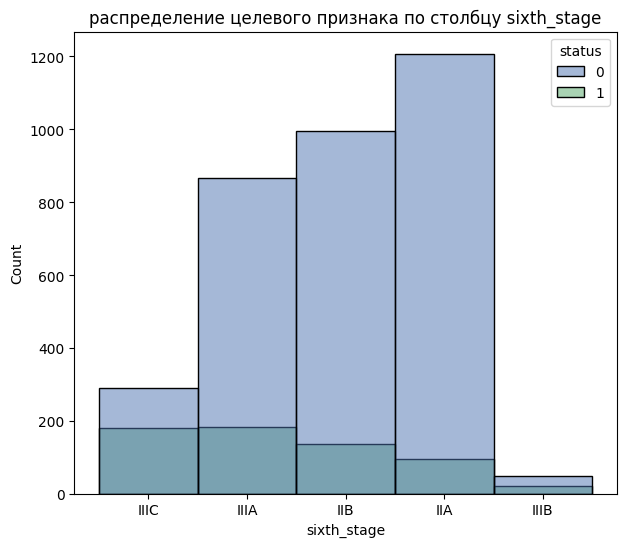

Распределение целевой пременной в зависимости от sixth_stage


sixth_stage  status
IIA          0         1208
             1           96
IIB          0          995
             1          135
IIIA         0          866
             1          184
IIIB         0           47
             1           20
IIIC         0          291
             1          181
Name: status, dtype: int64

Распределение целевой пременной в зависимости от sixth_stage в процентах


sixth_stage  status
IIA          0         0.926380
             1         0.073620
IIB          0         0.880531
             1         0.119469
IIIA         0         0.824762
             1         0.175238
IIIB         0         0.701493
             1         0.298507
IIIC         0         0.616525
             1         0.383475
Name: status, dtype: float64

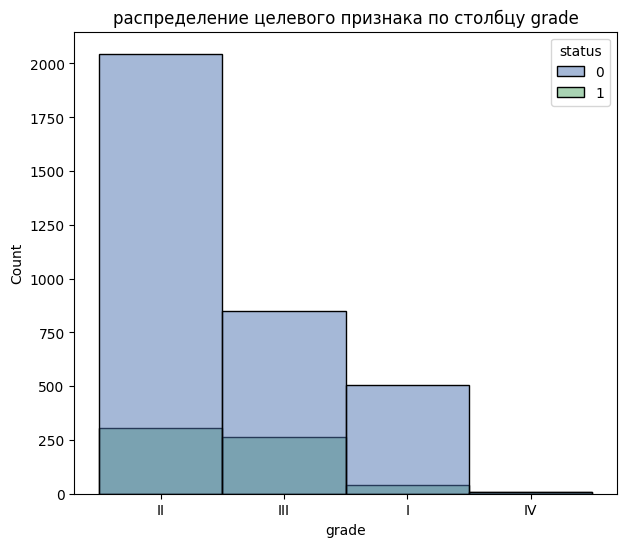

Распределение целевой пременной в зависимости от grade


grade  status
I      0          504
       1           39
II     0         2045
       1          305
III    0          848
       1          263
IV     0           10
       1            9
Name: status, dtype: int64

Распределение целевой пременной в зависимости от grade в процентах


grade  status
I      0         0.928177
       1         0.071823
II     0         0.870213
       1         0.129787
III    0         0.763276
       1         0.236724
IV     0         0.526316
       1         0.473684
Name: status, dtype: float64

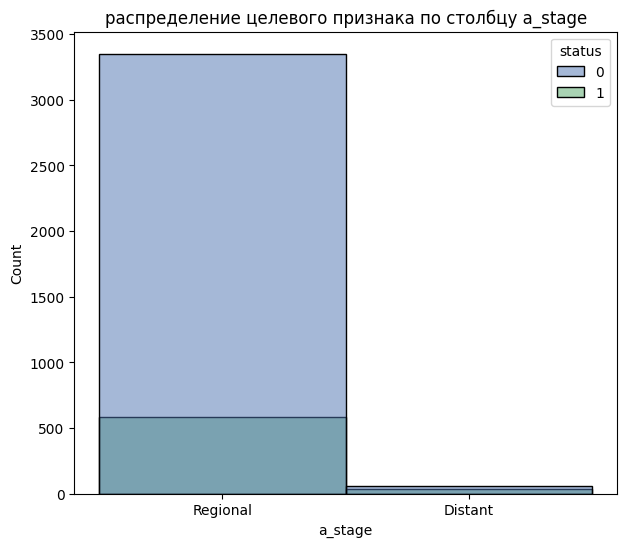

Распределение целевой пременной в зависимости от a_stage


a_stage   status
Distant   0           57
          1           35
Regional  0         3350
          1          581
Name: status, dtype: int64

Распределение целевой пременной в зависимости от a_stage в процентах


a_stage   status
Distant   0         0.619565
          1         0.380435
Regional  0         0.852200
          1         0.147800
Name: status, dtype: float64

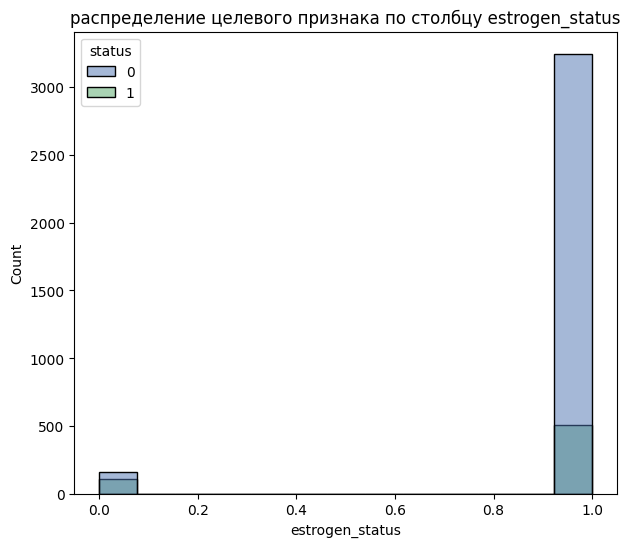

Распределение целевой пременной в зависимости от estrogen_status


estrogen_status  status
0                0          161
                 1          108
1                0         3246
                 1          508
Name: status, dtype: int64

Распределение целевой пременной в зависимости от estrogen_status в процентах


estrogen_status  status
0                0         0.598513
                 1         0.401487
1                0         0.864678
                 1         0.135322
Name: status, dtype: float64

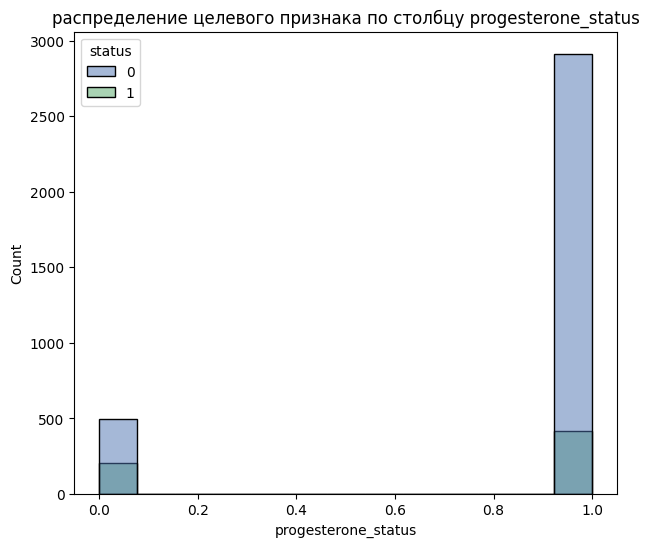

Распределение целевой пременной в зависимости от progesterone_status


progesterone_status  status
0                    0          494
                     1          204
1                    0         2913
                     1          412
Name: status, dtype: int64

Распределение целевой пременной в зависимости от progesterone_status в процентах


progesterone_status  status
0                    0         0.707736
                     1         0.292264
1                    0         0.876090
                     1         0.123910
Name: status, dtype: float64

In [14]:
for i, feature in enumerate(categorical_features):
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    sns.histplot(data=cancer_data, 
                 x=feature, 
                 ax=ax, 
                 hue='status'
                )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Распределение целевой пременной в зависимости от {feature}")
    display(
        cancer_data.groupby(feature)['status'].value_counts()
    )
    print(f"Распределение целевой пременной в зависимости от {feature} в процентах")
    display(
        cancer_data.groupby(feature)['status'].value_counts() / cancer_data.groupby(feature)['status'].count()
    )

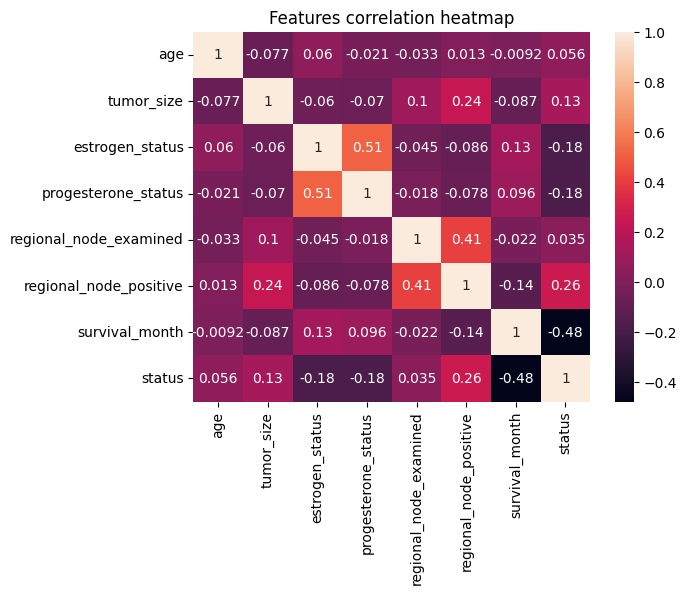

In [15]:
ax = sns.heatmap(
    cancer_data.corr(numeric_only=True), 
    annot=True,
)
ax.set_title("Features correlation heatmap")
None

***Looks like we dont have high-correlated features, so we don't need to drop any column***

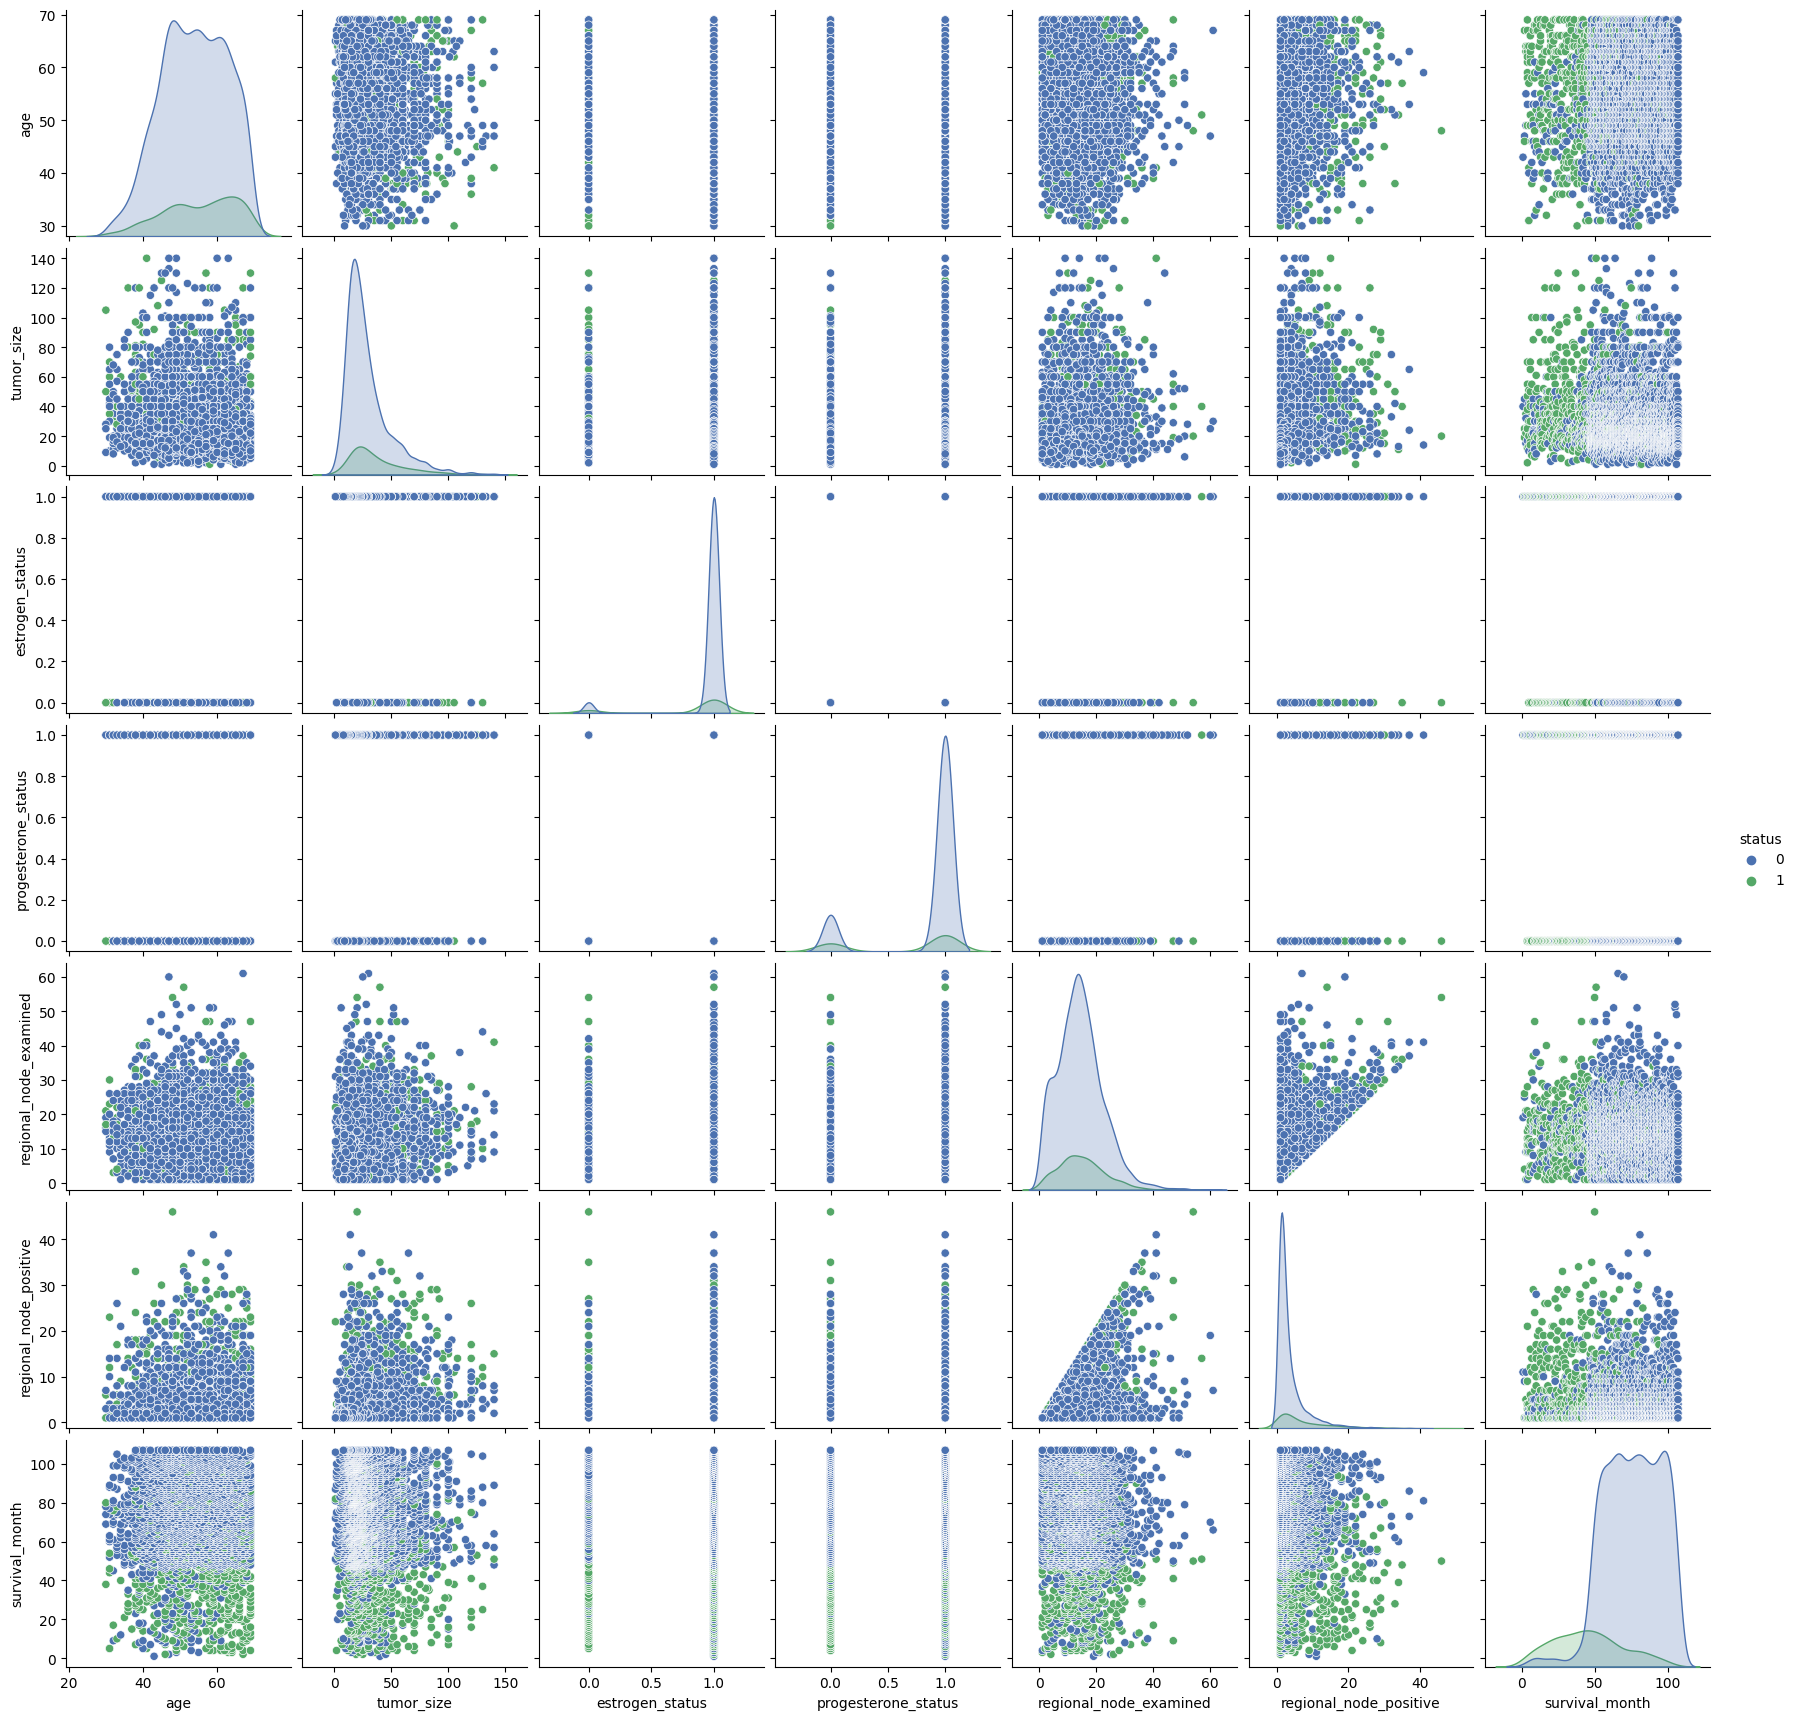

In [16]:
sns.pairplot(data=cancer_data, hue='status')

### EDA summary
1) Chance of surviving highly depends on survival month.  
After research I found that it's calculating like this:  
FLOOR((endpoint – date of diagnosis) / days in a month).  
So basicaly if women was late with diagnostics and, unfortunatley died, this feature will show it.  
Therefore it will not be used for modeling, because it can lead to data leakage.  
2) Women with higher age have more chances to die of breast cancer.  
3) After little research I found that if progesteron and estrogen status is negative cancer if much harder to treat, 
It is shown in this data analisys, because procent of alive women with negative estrogen and progesterone status is lower than with positive. We'll probably need one more column that will discribe both negative estrogen and negative progesterone.

In [17]:
cancer_data["progesterone_estrogen"] = cancer_data.progesterone_status & cancer_data.estrogen_status

In [18]:
cancer_data.corr(numeric_only=True)["progesterone_estrogen"]

age                      -0.012686
tumor_size               -0.072642
estrogen_status           0.570933
progesterone_status       0.977211
regional_node_examined   -0.018615
regional_node_positive   -0.077067
survival_month            0.093698
status                   -0.177772
progesterone_estrogen     1.000000
Name: progesterone_estrogen, dtype: float64

**It has very high correlation with progesterone status, so I'll drop it along with survival_month column**

In [19]:
cancer_data = cancer_data.drop(['progesterone_estrogen', 'survival_month'], axis=1)

*Thats how our data looks after eda*

In [20]:
cancer_data.head(5)

age   race   mariage t_stage n_stage sixth_stage grade   a_stage  \
0   43  Other   Married      T2      N3        IIIC    II  Regional   
1   47  Other   Married      T2      N2        IIIA    II  Regional   
2   67  White   Married      T2      N1         IIB   III  Regional   
3   46  White  Divorced      T1      N1         IIA    II  Regional   
4   63  White   Married      T2      N2        IIIA    II  Regional   

   tumor_size  estrogen_status  progesterone_status  regional_node_examined  \
0          40                1                    1                      19   
1          45                1                    1                      25   
2          25                1                    1                       4   
3          19                1                    1                      26   
4          35                1                    1                      21   

   regional_node_positive  status  
0                      11       0  
1                       9       0  
2                       1       1  
3                       1       1  
4                       5       1

# Models

* As a metric we could use *Recall* as it will lower probability of us misclassifying probable death and doctors can make some desperate decisions in order to safe one's life.   
* For dealing with unbalanced data we'll use several techniques and compare them to modeling with unbalanced classes:
    * **ADASYN**
    * **SMOTE**  
* As a model we'll use random forest, logistic regresion and different types of boosting(catboost and xgboost). Also we could use neural networks, but there are too few data to properly train them.

In [21]:
# imports for ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# fixing unbalanced
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC

# boostings
from catboost import CatBoostClassifier, Pool
from catboost.metrics import Recall, Precision

from xgboost import XGBClassifier

In [22]:
X, y = cancer_data.drop('status', axis=1), cancer_data.status

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True,
                                                    stratify=y
                                               )

In [24]:
numerical_features = [
    'age',
    'tumor_size',
    'regional_node_examined',
    'regional_node_positive',
    'estrogen_status',
    'progesterone_status'
]
categorical_features = [
    'race',
    'mariage',
    't_stage',
    'n_stage',
    'sixth_stage',
    'grade',
    'a_stage'
]

## 1. Unbalanced classes

In [25]:
# Data pipelines
numeric_transformer = Pipeline(steps=[
    ('scaling', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoding', OneHotEncoder())
])
data_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])
preprocessor = Pipeline(steps=[('data_transformer', data_transformer)])
preprocessor

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'tumor_size',
                                                   'regional_node_examined',
                                                   'regional_node_positive',
                                                   'estrogen_status',
                                                   'progesterone_status']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['race', 'mariage', 't_stage',
                                                   'n_stage', 'sixth_stage',
                                                   'grade', 'a_stage'])]))])

### 1.  Logistic Regression

In [26]:
lr = LogisticRegression()
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', lr)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression())])

In [27]:
param_grid = {
    'classification__penalty' : ['none', 'l2'],
    'classification__C': np.arange(0.1, 2, 0.1)
}

In [28]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5,
                  n_jobs=-1,
                  verbose=2
                 )
gs.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaling',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'tumor_size',
                                                                                           'regional_node_examined',
                                                                                           'regional_node_positive',
                                                                                           'estrogen_status',
                                                                                           'progesterone_status']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoding',
                                                                                                           OneHotEncoder())]),
                                                                                          ['race',
                                                                                           'mariage',
                                                                                           't_stage',
                                                                                           'n_stage',
                                                                                           'sixth_stage',
                                                                                           'grade',
                                                                                           'a_stage'])]))])),
                                       ('classification',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classification__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'classification__penalty': ['none', 'l2']},
             scoring='recall', verbose=2)

In [29]:
gs.best_score_

0.14811379097093383

In [30]:
gs.best_params_

{'classification__C': 0.2, 'classification__penalty': 'l2'}

**Actual Model**

In [31]:
lr = LogisticRegression(C= 0.2, penalty='l2')
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', lr)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression(C=0.2))])

In [32]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression(C=0.2))])

In [33]:
results = model.predict(X_test)

In [34]:
def display_confusion_matrix(y_true, y_predicted):
    true_pos = y_true[y_true == y_predicted][y_true == 1].count()
    true_neg = y_true[y_true == y_predicted][y_true == 0].count()
    false_pos = y_true[y_true != y_predicted][y_true == 1].count()
    false_neg = y_true[y_true != y_predicted][y_true == 0].count()
    cm = np.array([[true_pos, false_pos],[false_neg, true_neg]])
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.heatmap(cm, 
                annot=True, 
                fmt='g',
                cbar=False, 
                xticklabels=['P', 'N'], 
                yticklabels=['P', 'N'],
                cmap='Blues',
                ax=ax[0]
               )
    sns.heatmap(cm / cm.sum(), 
                annot=True, 
                fmt='.2%',
                cbar=False, 
                xticklabels=['P', 'N'], 
                yticklabels=['P', 'N'],
                cmap='Blues',
                ax=ax[1]
               )
    fig.suptitle("Confusion matrices")
    ax[0].set_title("absolute values")
    ax[0].set_xlabel("predicted labels")
    ax[0].set_ylabel("actual labels")
    ax[1].set_title("percentages")
    ax[1].set_xlabel("predicted labels")
    ax[1].set_ylabel("actual labels")
    plt.show()

    print(f'accuracy = {accuracy_score(y_true, y_predicted)}')
    print(f'precision = {precision_score(y_true, y_predicted)}')
    print(f'recall = {recall_score(y_true, y_predicted)}')

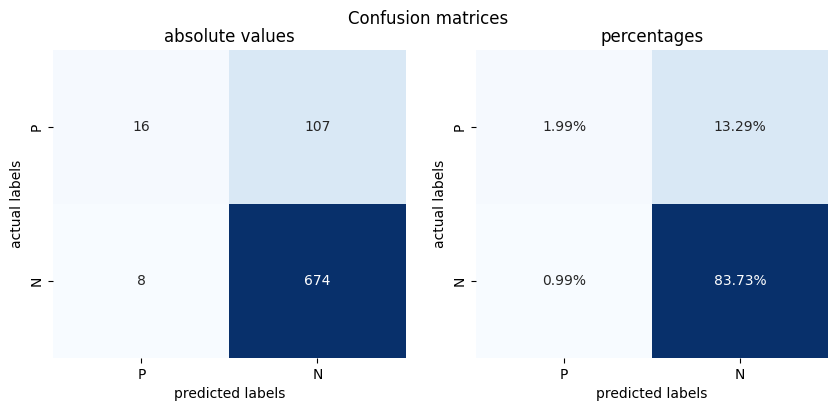

accuracy = 0.8571428571428571
precision = 0.6666666666666666
recall = 0.13008130081300814


In [35]:
display_confusion_matrix(y_test, results)

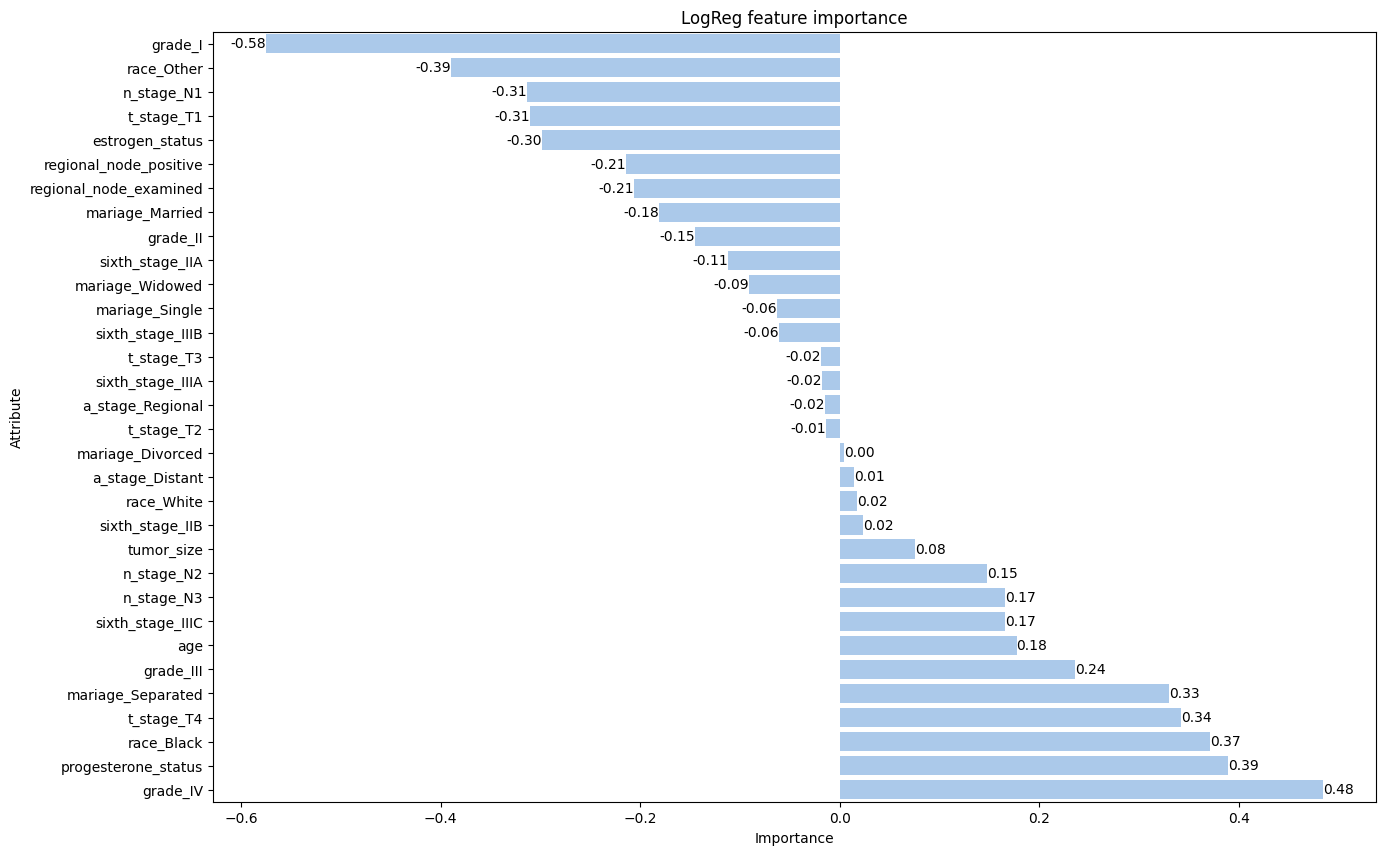

In [36]:
feature_importance = pd.DataFrame(data={
    'Attribute': pd.get_dummies(X_train).columns,
    'Importance': model.named_steps.classification.coef_[0]
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("LogReg feature importance")
None

## 2. RandomForest

In [37]:
rf = RandomForestClassifier()
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier())])

In [38]:
param_grid = {
    'classification__n_estimators' : [300, 500, 700, 900, 1100],
    'classification__max_depth' : [3, 4, 5, None],
    'classification__min_samples_leaf' : [1, 2, 4],
    'classification__bootstrap': [True],
}

In [39]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5,
                  n_jobs=-1,
                  verbose=10
                 )
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaling',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'tumor_size',
                                                                                           'regional_node_examined',
                                                                                           'regional_node_positive',
                                                                                           'estrogen_status',
                                                                                           'progesterone_status']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoding',
                                                                                                           OneHotEncoder())]),
                                                                                          ['race',
                                                                                           'mariage',
                                                                                           't_stage',
                                                                                           'n_stage',
                                                                                           'sixth_stage',
                                                                                           'grade',
                                                                                           'a_stage'])]))])),
                                       ('classification',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classification__bootstrap': [True],
                         'classification__max_depth': [3, 4, 5, None],
                         'classification__min_samples_leaf': [1, 2, 4],
                         'classification__n_estimators': [300, 500, 700, 900,
                                                          1100]},
             scoring='recall', verbose=10)

In [40]:
gs.best_score_

0.14605236033807462

In [41]:
gs.best_params_

{'classification__bootstrap': True,
 'classification__max_depth': None,
 'classification__min_samples_leaf': 1,
 'classification__n_estimators': 1100}

Actual model

In [42]:
rf = RandomForestClassifier(n_estimators=900, bootstrap=True, max_depth=None, min_samples_leaf=1)
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier(n_estimators=900))])

In [43]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier(n_estimators=900))])

In [44]:
y_pred = model.predict(X_test)

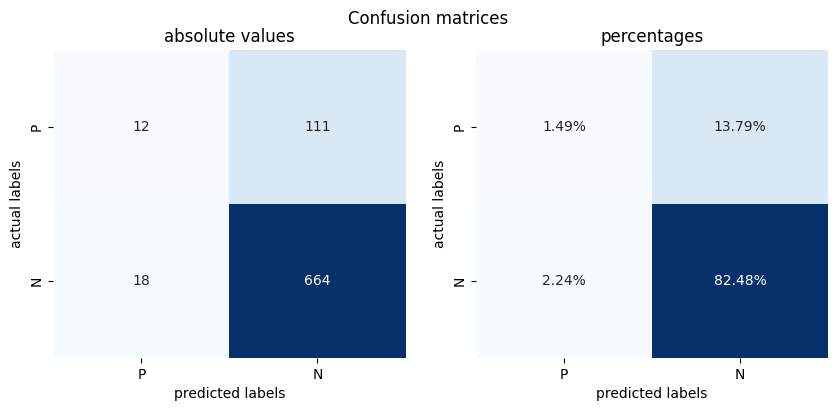

accuracy = 0.8397515527950311
precision = 0.4
recall = 0.0975609756097561


In [45]:
display_confusion_matrix(y_test, y_pred)

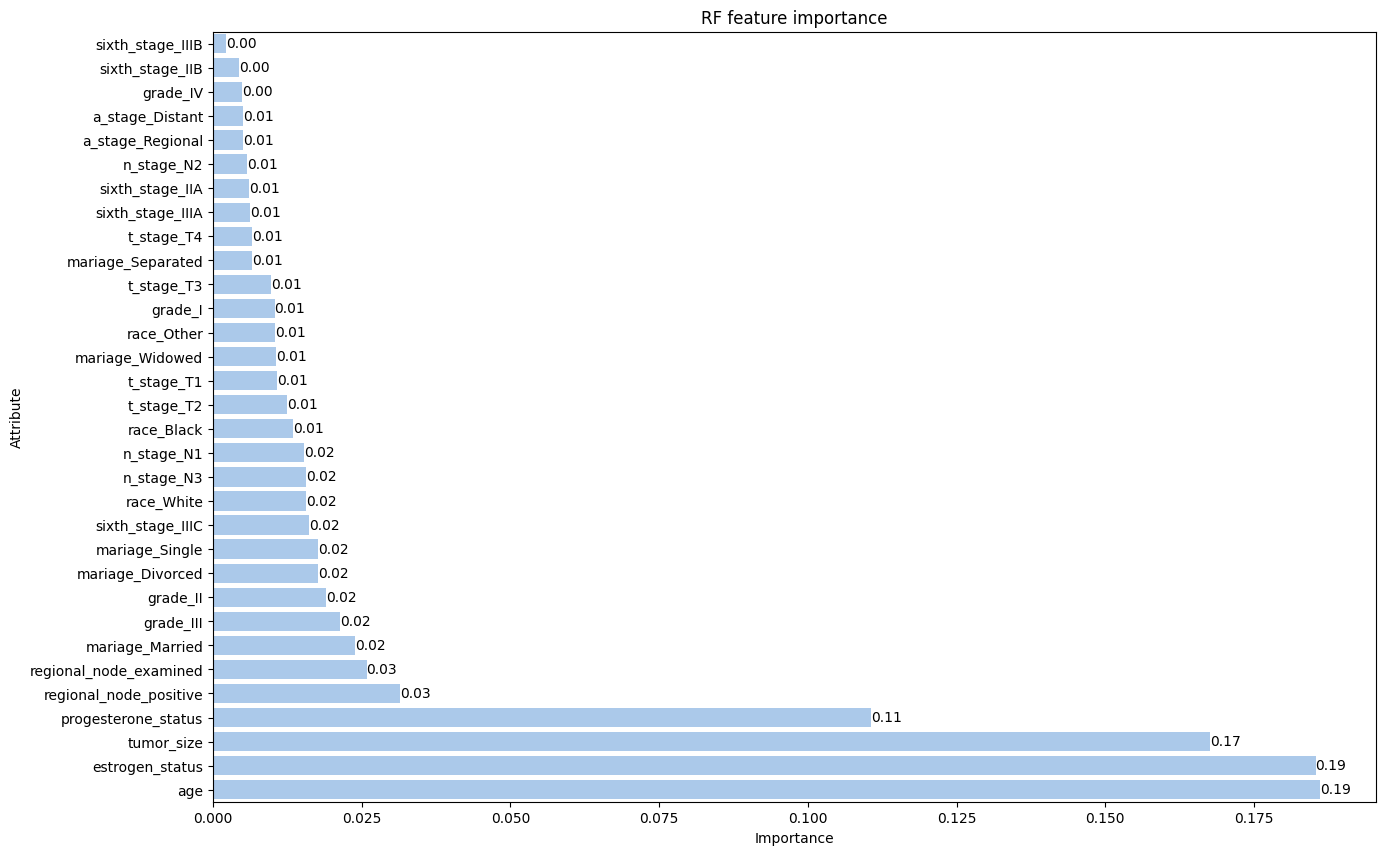

In [46]:
feature_importance = pd.DataFrame(data={
    'Attribute': pd.get_dummies(X_train).columns,
    'Importance': model.named_steps.classification.feature_importances_
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("RF feature importance")
None

CATBOOST

In [47]:
model = CatBoostClassifier(learning_rate=0.04,
                           custom_metric=['Recall'])

In [48]:
cdata_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numerical_features),
    ('cat', 'passthrough', categorical_features)
])

#[(lambda x: x.replace('numeric__', '').replace('cat__', ''))(x) for x in (cdata_transformer.get_feature_names_out())])
cX_train = pd.DataFrame(cdata_transformer.fit_transform(X_train), columns=numerical_features + categorical_features)
cX_test = pd.DataFrame(cdata_transformer.fit_transform(X_test), columns=numerical_features + categorical_features)

In [49]:
test_cat_data = Pool(cX_test, y_test, cat_features=categorical_features)

model.fit(cX_train,
          y_train,
          eval_set=test_cat_data,
          verbose=True, cat_features=categorical_features)

0:	learn: 0.6677584	test: 0.6676192	best: 0.6676192 (0)	total: 204ms	remaining: 3m 24s
1:	learn: 0.6453559	test: 0.6452175	best: 0.6452175 (1)	total: 225ms	remaining: 1m 52s
2:	learn: 0.6227706	test: 0.6223571	best: 0.6223571 (2)	total: 251ms	remaining: 1m 23s
3:	learn: 0.6016797	test: 0.6015113	best: 0.6015113 (3)	total: 276ms	remaining: 1m 8s
4:	learn: 0.5812797	test: 0.5812733	best: 0.5812733 (4)	total: 302ms	remaining: 1m
5:	learn: 0.5642958	test: 0.5645694	best: 0.5645694 (5)	total: 327ms	remaining: 54.1s
6:	learn: 0.5472350	test: 0.5479978	best: 0.5479978 (6)	total: 353ms	remaining: 50.1s
7:	learn: 0.5357144	test: 0.5364859	best: 0.5364859 (7)	total: 362ms	remaining: 44.8s
8:	learn: 0.5211622	test: 0.5219397	best: 0.5219397 (8)	total: 397ms	remaining: 43.7s
9:	learn: 0.5096505	test: 0.5104775	best: 0.5104775 (9)	total: 420ms	remaining: 41.6s
10:	learn: 0.4982067	test: 0.4990794	best: 0.4990794 (10)	total: 455ms	remaining: 40.9s
11:	learn: 0.4886388	test: 0.4897332	best: 0.4897332

97:	learn: 0.3482527	test: 0.3732180	best: 0.3732180 (97)	total: 2.85s	remaining: 26.3s
98:	learn: 0.3478999	test: 0.3730384	best: 0.3730384 (98)	total: 2.88s	remaining: 26.2s
99:	learn: 0.3476544	test: 0.3728842	best: 0.3728842 (99)	total: 2.91s	remaining: 26.2s
100:	learn: 0.3472672	test: 0.3727945	best: 0.3727945 (100)	total: 2.94s	remaining: 26.2s
101:	learn: 0.3471174	test: 0.3728777	best: 0.3727945 (100)	total: 2.97s	remaining: 26.2s
102:	learn: 0.3468670	test: 0.3728521	best: 0.3727945 (100)	total: 3s	remaining: 26.1s
103:	learn: 0.3463783	test: 0.3726974	best: 0.3726974 (103)	total: 3.03s	remaining: 26.1s
104:	learn: 0.3459593	test: 0.3727198	best: 0.3726974 (103)	total: 3.06s	remaining: 26.1s
105:	learn: 0.3458936	test: 0.3727115	best: 0.3726974 (103)	total: 3.08s	remaining: 26s
106:	learn: 0.3458213	test: 0.3727022	best: 0.3726974 (103)	total: 3.11s	remaining: 26s
107:	learn: 0.3456702	test: 0.3724955	best: 0.3724955 (107)	total: 3.15s	remaining: 26s
108:	learn: 0.3452551	tes

190:	learn: 0.3267000	test: 0.3707844	best: 0.3704187 (151)	total: 5.49s	remaining: 23.2s
191:	learn: 0.3263233	test: 0.3708092	best: 0.3704187 (151)	total: 5.51s	remaining: 23.2s
192:	learn: 0.3259715	test: 0.3710414	best: 0.3704187 (151)	total: 5.54s	remaining: 23.2s
193:	learn: 0.3257983	test: 0.3708728	best: 0.3704187 (151)	total: 5.57s	remaining: 23.1s
194:	learn: 0.3253752	test: 0.3706595	best: 0.3704187 (151)	total: 5.6s	remaining: 23.1s
195:	learn: 0.3248594	test: 0.3707996	best: 0.3704187 (151)	total: 5.62s	remaining: 23.1s
196:	learn: 0.3246677	test: 0.3708072	best: 0.3704187 (151)	total: 5.65s	remaining: 23s
197:	learn: 0.3245501	test: 0.3707291	best: 0.3704187 (151)	total: 5.68s	remaining: 23s
198:	learn: 0.3245215	test: 0.3706659	best: 0.3704187 (151)	total: 5.7s	remaining: 22.9s
199:	learn: 0.3245208	test: 0.3706592	best: 0.3704187 (151)	total: 5.71s	remaining: 22.9s
200:	learn: 0.3244208	test: 0.3706557	best: 0.3704187 (151)	total: 5.75s	remaining: 22.8s
201:	learn: 0.32

283:	learn: 0.3039744	test: 0.3723575	best: 0.3703323 (229)	total: 8.12s	remaining: 20.5s
284:	learn: 0.3039169	test: 0.3723694	best: 0.3703323 (229)	total: 8.15s	remaining: 20.4s
285:	learn: 0.3036402	test: 0.3722444	best: 0.3703323 (229)	total: 8.18s	remaining: 20.4s
286:	learn: 0.3034487	test: 0.3722242	best: 0.3703323 (229)	total: 8.21s	remaining: 20.4s
287:	learn: 0.3032882	test: 0.3722693	best: 0.3703323 (229)	total: 8.24s	remaining: 20.4s
288:	learn: 0.3032266	test: 0.3722441	best: 0.3703323 (229)	total: 8.26s	remaining: 20.3s
289:	learn: 0.3031061	test: 0.3720557	best: 0.3703323 (229)	total: 8.29s	remaining: 20.3s
290:	learn: 0.3026766	test: 0.3721747	best: 0.3703323 (229)	total: 8.32s	remaining: 20.3s
291:	learn: 0.3026503	test: 0.3721536	best: 0.3703323 (229)	total: 8.35s	remaining: 20.3s
292:	learn: 0.3023295	test: 0.3721510	best: 0.3703323 (229)	total: 8.38s	remaining: 20.2s
293:	learn: 0.3022213	test: 0.3725304	best: 0.3703323 (229)	total: 8.41s	remaining: 20.2s
294:	learn

375:	learn: 0.2857119	test: 0.3743754	best: 0.3703323 (229)	total: 10.8s	remaining: 17.9s
376:	learn: 0.2854351	test: 0.3743686	best: 0.3703323 (229)	total: 10.8s	remaining: 17.9s
377:	learn: 0.2853578	test: 0.3742876	best: 0.3703323 (229)	total: 10.9s	remaining: 17.9s
378:	learn: 0.2848650	test: 0.3743415	best: 0.3703323 (229)	total: 10.9s	remaining: 17.9s
379:	learn: 0.2848481	test: 0.3743370	best: 0.3703323 (229)	total: 10.9s	remaining: 17.8s
380:	learn: 0.2847413	test: 0.3744666	best: 0.3703323 (229)	total: 11s	remaining: 17.8s
381:	learn: 0.2845865	test: 0.3745005	best: 0.3703323 (229)	total: 11s	remaining: 17.8s
382:	learn: 0.2845628	test: 0.3745085	best: 0.3703323 (229)	total: 11s	remaining: 17.8s
383:	learn: 0.2844804	test: 0.3744865	best: 0.3703323 (229)	total: 11.1s	remaining: 17.7s
384:	learn: 0.2840906	test: 0.3745171	best: 0.3703323 (229)	total: 11.1s	remaining: 17.7s
385:	learn: 0.2837831	test: 0.3746479	best: 0.3703323 (229)	total: 11.1s	remaining: 17.7s
386:	learn: 0.28

470:	learn: 0.2703448	test: 0.3788122	best: 0.3703323 (229)	total: 13.6s	remaining: 15.3s
471:	learn: 0.2701507	test: 0.3787218	best: 0.3703323 (229)	total: 13.7s	remaining: 15.3s
472:	learn: 0.2696984	test: 0.3788604	best: 0.3703323 (229)	total: 13.7s	remaining: 15.2s
473:	learn: 0.2695541	test: 0.3788538	best: 0.3703323 (229)	total: 13.7s	remaining: 15.2s
474:	learn: 0.2694432	test: 0.3788118	best: 0.3703323 (229)	total: 13.7s	remaining: 15.2s
475:	learn: 0.2690360	test: 0.3788893	best: 0.3703323 (229)	total: 13.8s	remaining: 15.2s
476:	learn: 0.2689621	test: 0.3788707	best: 0.3703323 (229)	total: 13.8s	remaining: 15.1s
477:	learn: 0.2688803	test: 0.3787957	best: 0.3703323 (229)	total: 13.8s	remaining: 15.1s
478:	learn: 0.2687753	test: 0.3786920	best: 0.3703323 (229)	total: 13.9s	remaining: 15.1s
479:	learn: 0.2685129	test: 0.3786792	best: 0.3703323 (229)	total: 13.9s	remaining: 15.1s
480:	learn: 0.2684437	test: 0.3787356	best: 0.3703323 (229)	total: 14s	remaining: 15.1s
481:	learn: 

565:	learn: 0.2577612	test: 0.3822696	best: 0.3703323 (229)	total: 16.7s	remaining: 12.8s
566:	learn: 0.2575484	test: 0.3822858	best: 0.3703323 (229)	total: 16.7s	remaining: 12.8s
567:	learn: 0.2573042	test: 0.3824102	best: 0.3703323 (229)	total: 16.8s	remaining: 12.7s
568:	learn: 0.2572314	test: 0.3825451	best: 0.3703323 (229)	total: 16.8s	remaining: 12.7s
569:	learn: 0.2571482	test: 0.3826513	best: 0.3703323 (229)	total: 16.8s	remaining: 12.7s
570:	learn: 0.2569905	test: 0.3825841	best: 0.3703323 (229)	total: 16.9s	remaining: 12.7s
571:	learn: 0.2567348	test: 0.3825209	best: 0.3703323 (229)	total: 16.9s	remaining: 12.6s
572:	learn: 0.2566284	test: 0.3826239	best: 0.3703323 (229)	total: 16.9s	remaining: 12.6s
573:	learn: 0.2565227	test: 0.3826528	best: 0.3703323 (229)	total: 16.9s	remaining: 12.6s
574:	learn: 0.2562391	test: 0.3827746	best: 0.3703323 (229)	total: 17s	remaining: 12.5s
575:	learn: 0.2561580	test: 0.3828115	best: 0.3703323 (229)	total: 17s	remaining: 12.5s
576:	learn: 0.

661:	learn: 0.2433998	test: 0.3849019	best: 0.3703323 (229)	total: 19.7s	remaining: 10.1s
662:	learn: 0.2433069	test: 0.3847212	best: 0.3703323 (229)	total: 19.7s	remaining: 10s
663:	learn: 0.2432199	test: 0.3846596	best: 0.3703323 (229)	total: 19.8s	remaining: 10s
664:	learn: 0.2431220	test: 0.3845532	best: 0.3703323 (229)	total: 19.8s	remaining: 9.97s
665:	learn: 0.2429398	test: 0.3845703	best: 0.3703323 (229)	total: 19.8s	remaining: 9.95s
666:	learn: 0.2426913	test: 0.3842228	best: 0.3703323 (229)	total: 19.9s	remaining: 9.92s
667:	learn: 0.2425864	test: 0.3842196	best: 0.3703323 (229)	total: 19.9s	remaining: 9.89s
668:	learn: 0.2424430	test: 0.3841845	best: 0.3703323 (229)	total: 19.9s	remaining: 9.86s
669:	learn: 0.2423552	test: 0.3840718	best: 0.3703323 (229)	total: 20s	remaining: 9.83s
670:	learn: 0.2421606	test: 0.3840640	best: 0.3703323 (229)	total: 20s	remaining: 9.81s
671:	learn: 0.2418518	test: 0.3843377	best: 0.3703323 (229)	total: 20s	remaining: 9.78s
672:	learn: 0.241707

757:	learn: 0.2318283	test: 0.3859906	best: 0.3703323 (229)	total: 22.8s	remaining: 7.27s
758:	learn: 0.2317263	test: 0.3859788	best: 0.3703323 (229)	total: 22.8s	remaining: 7.24s
759:	learn: 0.2316246	test: 0.3860718	best: 0.3703323 (229)	total: 22.8s	remaining: 7.21s
760:	learn: 0.2315626	test: 0.3861204	best: 0.3703323 (229)	total: 22.9s	remaining: 7.18s
761:	learn: 0.2315020	test: 0.3861363	best: 0.3703323 (229)	total: 22.9s	remaining: 7.15s
762:	learn: 0.2312613	test: 0.3863377	best: 0.3703323 (229)	total: 22.9s	remaining: 7.12s
763:	learn: 0.2311644	test: 0.3861976	best: 0.3703323 (229)	total: 23s	remaining: 7.09s
764:	learn: 0.2311224	test: 0.3861997	best: 0.3703323 (229)	total: 23s	remaining: 7.07s
765:	learn: 0.2308544	test: 0.3864691	best: 0.3703323 (229)	total: 23s	remaining: 7.04s
766:	learn: 0.2307680	test: 0.3865370	best: 0.3703323 (229)	total: 23.1s	remaining: 7.01s
767:	learn: 0.2306959	test: 0.3866029	best: 0.3703323 (229)	total: 23.1s	remaining: 6.98s
768:	learn: 0.23

851:	learn: 0.2213130	test: 0.3896587	best: 0.3703323 (229)	total: 25.6s	remaining: 4.44s
852:	learn: 0.2212614	test: 0.3897007	best: 0.3703323 (229)	total: 25.6s	remaining: 4.41s
853:	learn: 0.2212191	test: 0.3896841	best: 0.3703323 (229)	total: 25.6s	remaining: 4.38s
854:	learn: 0.2210917	test: 0.3896136	best: 0.3703323 (229)	total: 25.7s	remaining: 4.35s
855:	learn: 0.2210236	test: 0.3896596	best: 0.3703323 (229)	total: 25.7s	remaining: 4.32s
856:	learn: 0.2208863	test: 0.3895160	best: 0.3703323 (229)	total: 25.7s	remaining: 4.29s
857:	learn: 0.2207734	test: 0.3896672	best: 0.3703323 (229)	total: 25.8s	remaining: 4.26s
858:	learn: 0.2207460	test: 0.3896291	best: 0.3703323 (229)	total: 25.8s	remaining: 4.23s
859:	learn: 0.2206675	test: 0.3896760	best: 0.3703323 (229)	total: 25.8s	remaining: 4.2s
860:	learn: 0.2205982	test: 0.3897383	best: 0.3703323 (229)	total: 25.9s	remaining: 4.17s
861:	learn: 0.2204596	test: 0.3897623	best: 0.3703323 (229)	total: 25.9s	remaining: 4.14s
862:	learn:

947:	learn: 0.2110154	test: 0.3922001	best: 0.3703323 (229)	total: 28.5s	remaining: 1.56s
948:	learn: 0.2109983	test: 0.3922048	best: 0.3703323 (229)	total: 28.5s	remaining: 1.53s
949:	learn: 0.2109331	test: 0.3922347	best: 0.3703323 (229)	total: 28.5s	remaining: 1.5s
950:	learn: 0.2107726	test: 0.3925176	best: 0.3703323 (229)	total: 28.6s	remaining: 1.47s
951:	learn: 0.2107598	test: 0.3924907	best: 0.3703323 (229)	total: 28.6s	remaining: 1.44s
952:	learn: 0.2107000	test: 0.3924759	best: 0.3703323 (229)	total: 28.6s	remaining: 1.41s
953:	learn: 0.2106194	test: 0.3928661	best: 0.3703323 (229)	total: 28.6s	remaining: 1.38s
954:	learn: 0.2104496	test: 0.3928164	best: 0.3703323 (229)	total: 28.7s	remaining: 1.35s
955:	learn: 0.2104413	test: 0.3928042	best: 0.3703323 (229)	total: 28.7s	remaining: 1.32s
956:	learn: 0.2103099	test: 0.3928284	best: 0.3703323 (229)	total: 28.7s	remaining: 1.29s
957:	learn: 0.2102121	test: 0.3927405	best: 0.3703323 (229)	total: 28.8s	remaining: 1.26s
958:	learn:

In [50]:
model.best_score_

{'learn': {'Recall': 0.5314401622718052, 'Logloss': 0.2058215719272751},
 'validation': {'Recall': 0.17073170731707318, 'Logloss': 0.37033233535035903}}

In [51]:
model.shrink(230)

In [52]:
y_pred = model.predict(test_cat_data)

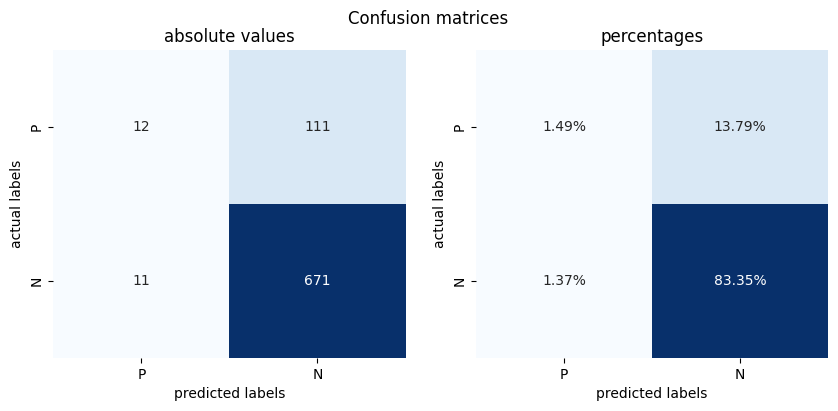

accuracy = 0.8484472049689441
precision = 0.5217391304347826
recall = 0.0975609756097561


In [53]:
display_confusion_matrix(y_test, y_pred)

In [54]:
model.feature_importances_

array([10.73133783,  8.24301863, 10.84225389, 10.56248854,  4.89692276,
        6.37667638,  7.62009612,  6.79367532,  5.34331088, 10.98730865,
        5.00693025, 12.36101559,  0.23496516])

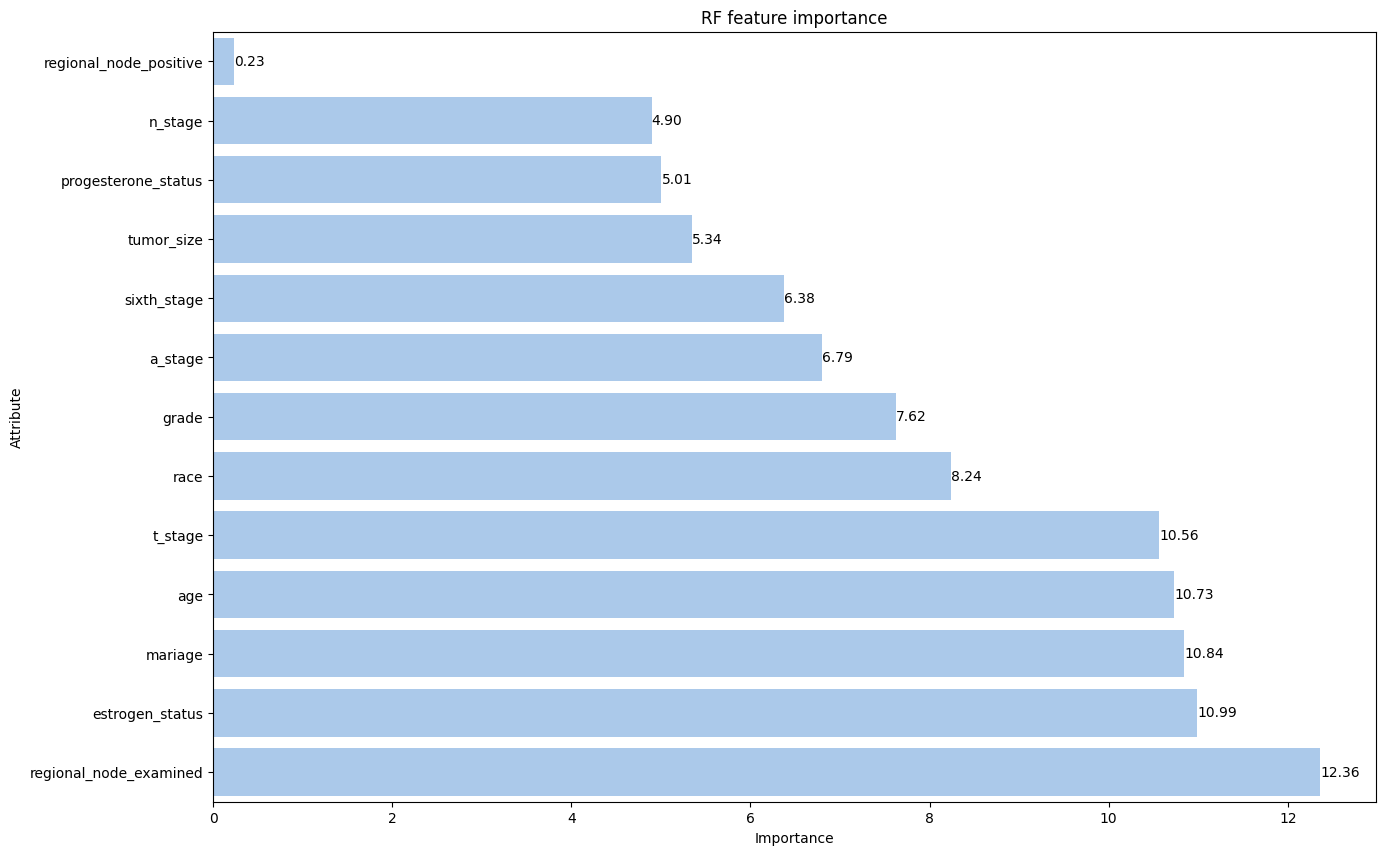

In [55]:
feature_importance = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("RF feature importance")
None

### Now with SMOTE

In [56]:
cat_features_indx = [i for i, col in enumerate(X_train.columns) if col in categorical_features]

In [57]:
smt = SMOTENC(categorical_features=cat_features_indx, random_state=42, sampling_strategy='auto') 
smoted_X_train, smoted_y_train = smt.fit_resample(X_train, y_train)

In [58]:
smoted_y_train.value_counts()

0    2725
1    2725
Name: status, dtype: int64

In [59]:
X_train.describe()

age   tumor_size  estrogen_status  progesterone_status  \
count  3218.000000  3218.000000      3218.000000          3218.000000   
mean     54.038533    30.625233         0.932878             0.821939   
std       8.960578    21.375123         0.250273             0.382623   
min      30.000000     1.000000         0.000000             0.000000   
25%      47.000000    16.000000         1.000000             1.000000   
50%      55.000000    25.000000         1.000000             1.000000   
75%      61.000000    38.000000         1.000000             1.000000   
max      69.000000   140.000000         1.000000             1.000000   

       regional_node_examined  regional_node_positive  
count             3218.000000             3218.000000  
mean                14.286513                4.180547  
std                  8.028970                5.143393  
min                  1.000000                1.000000  
25%                  9.000000                1.000000  
50%                 14.000000                2.000000  
75%                 19.000000                5.000000  
max                 61.000000               46.000000

In [60]:
lr = LogisticRegression()
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', lr)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression())])

In [61]:
param_grid = {
    'classification__penalty' : ['none', 'l2'],
    'classification__C': np.arange(0.1, 2, 0.1)
}

In [62]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5,
                  n_jobs=-1,
                  verbose=2
                 )
gs.fit(smoted_X_train, smoted_y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


C:\Users\Windows\anaconda3\envs\kaggle_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaling',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'tumor_size',
                                                                                           'regional_node_examined',
                                                                                           'regional_node_positive',
                                                                                           'estrogen_status',
                                                                                           'progesterone_status']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoding',
                                                                                                           OneHotEncoder())]),
                                                                                          ['race',
                                                                                           'mariage',
                                                                                           't_stage',
                                                                                           'n_stage',
                                                                                           'sixth_stage',
                                                                                           'grade',
                                                                                           'a_stage'])]))])),
                                       ('classification',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classification__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'classification__penalty': ['none', 'l2']},
             scoring='recall', verbose=2)

In [63]:
gs.best_params_

{'classification__C': 0.9, 'classification__penalty': 'l2'}

In [64]:
gs.best_score_

0.713394495412844

In [65]:
lr = LogisticRegression(C= 0.9, penalty= 'l2')
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', lr)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression(C=0.9))])

In [66]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', LogisticRegression(C=0.9))])

In [67]:
y_pred = model.predict(X_test)

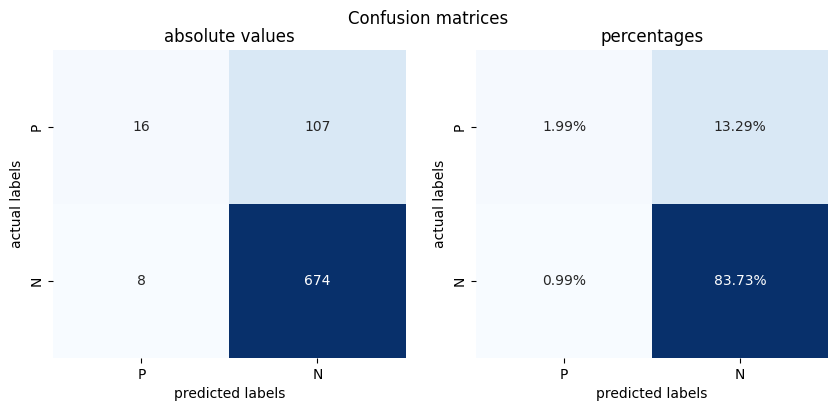

accuracy = 0.8571428571428571
precision = 0.6666666666666666
recall = 0.13008130081300814


In [68]:
display_confusion_matrix(y_test, y_pred)

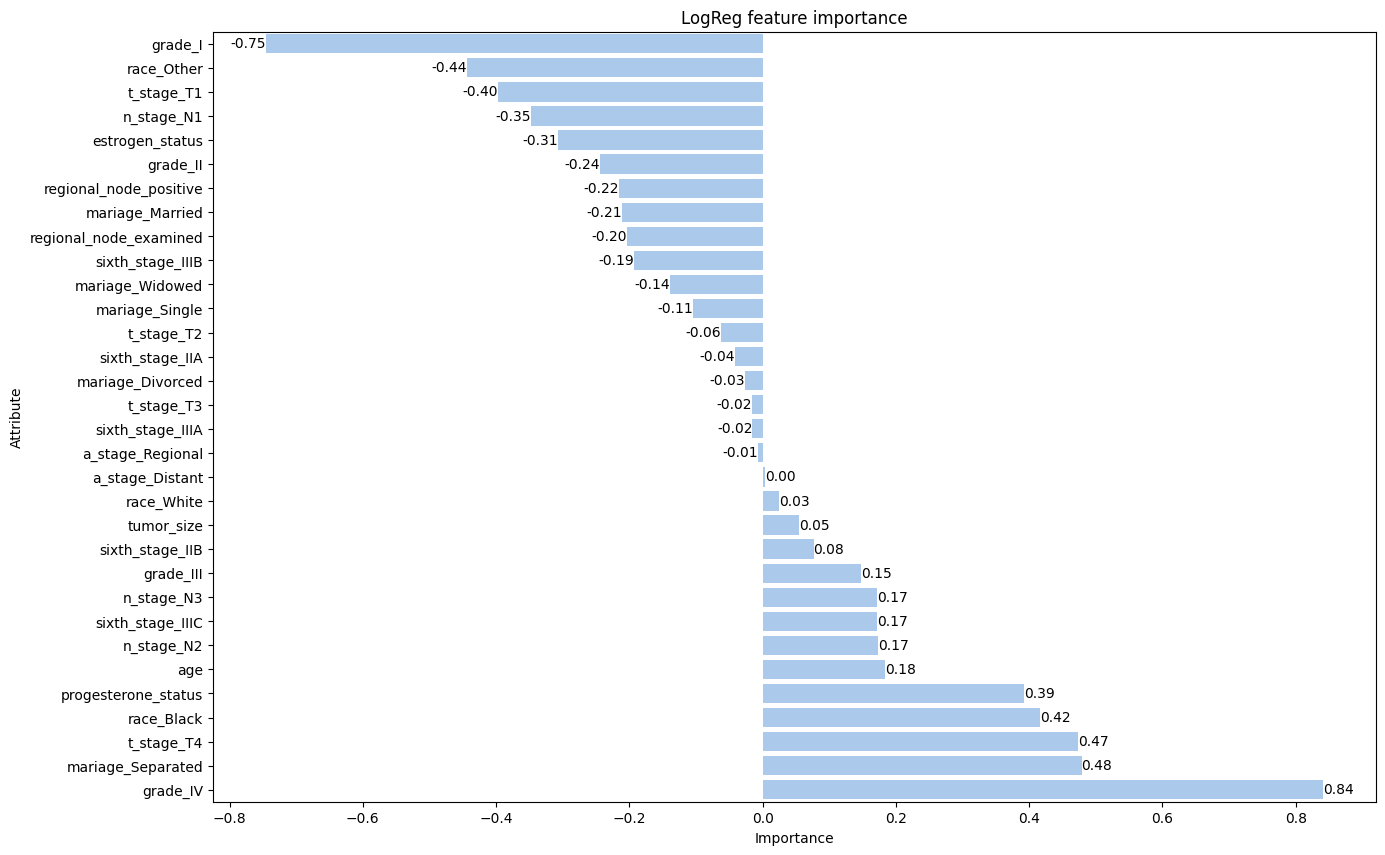

In [69]:
feature_importance = pd.DataFrame(data={
    'Attribute': pd.get_dummies(X_train).columns,
    'Importance': model.named_steps.classification.coef_[0]
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("LogReg feature importance")
None

RF

In [70]:
rf = RandomForestClassifier()
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier())])

In [71]:
param_grid = {
    'classification__n_estimators' : [300, 500, 700, 900, 1100],
    'classification__max_depth' : [3, 4, 5, None],
    'classification__min_samples_leaf' : [1, 2, 4],
    'classification__bootstrap': [True],
}

In [72]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5,
                  n_jobs=-1,
                  verbose=10
                 )
gs.fit(smoted_X_train, smoted_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaling',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'tumor_size',
                                                                                           'regional_node_examined',
                                                                                           'regional_node_positive',
                                                                                           'estrogen_status',
                                                                                           'progesterone_status']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoding',
                                                                                                           OneHotEncoder())]),
                                                                                          ['race',
                                                                                           'mariage',
                                                                                           't_stage',
                                                                                           'n_stage',
                                                                                           'sixth_stage',
                                                                                           'grade',
                                                                                           'a_stage'])]))])),
                                       ('classification',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classification__bootstrap': [True],
                         'classification__max_depth': [3, 4, 5, None],
                         'classification__min_samples_leaf': [1, 2, 4],
                         'classification__n_estimators': [300, 500, 700, 900,
                                                          1100]},
             scoring='recall', verbose=10)

In [73]:
gs.best_score_

0.8579816513761468

In [74]:
gs.best_params_

{'classification__bootstrap': True,
 'classification__max_depth': None,
 'classification__min_samples_leaf': 1,
 'classification__n_estimators': 300}

Actual model

In [75]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, max_depth=None, min_samples_leaf=1)
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier(n_estimators=500))])

In [76]:
model.fit(smoted_X_train, smoted_y_train)

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification', RandomForestClassifier(n_estimators=500))])

In [77]:
y_pred = model.predict(X_test)

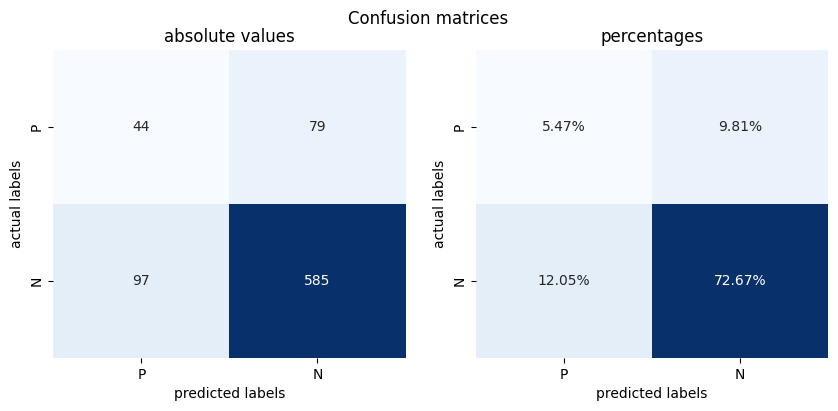

accuracy = 0.7813664596273292
precision = 0.3120567375886525
recall = 0.35772357723577236


In [78]:
display_confusion_matrix(y_test, y_pred)

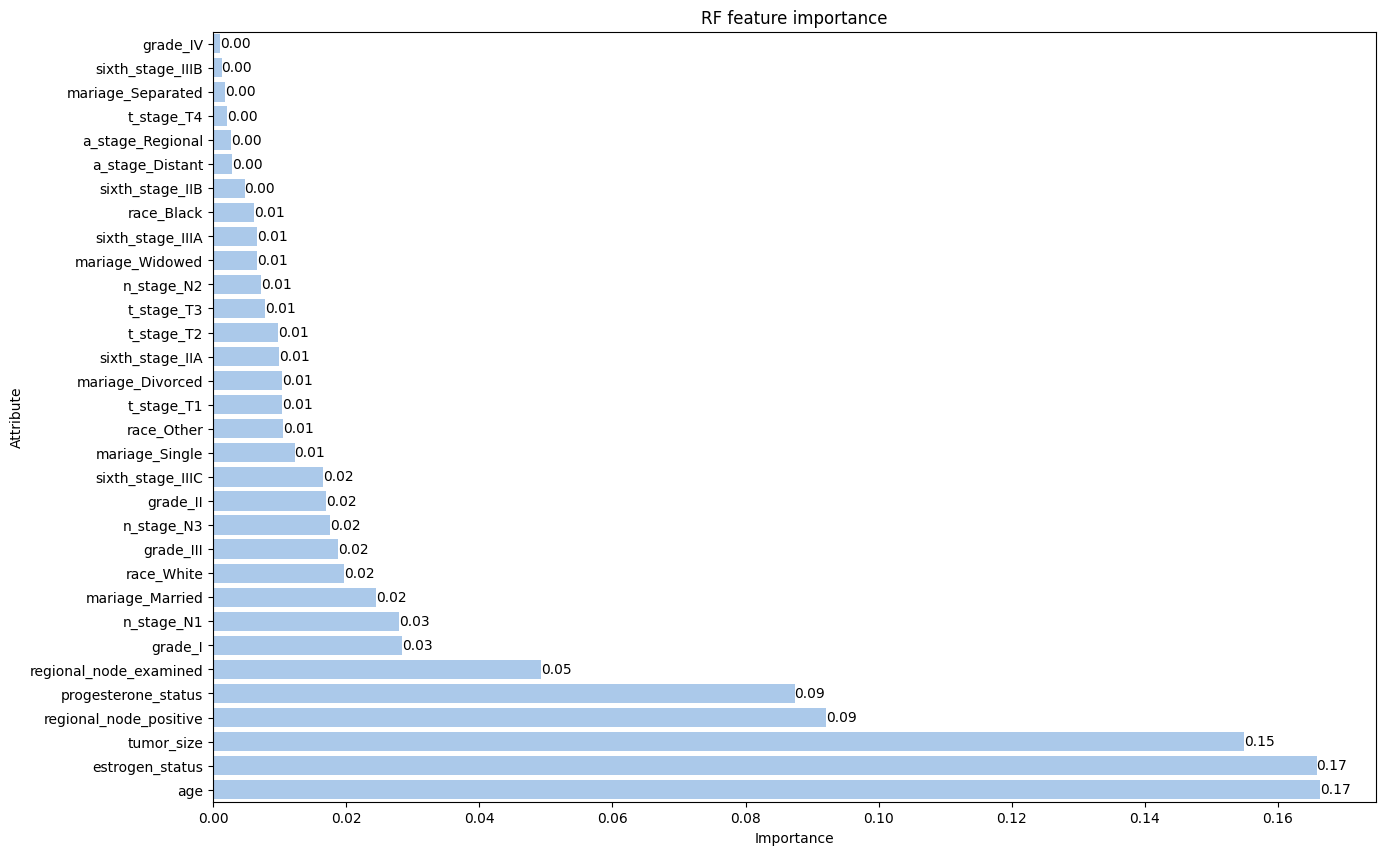

In [79]:
feature_importance = pd.DataFrame(data={
    'Attribute': pd.get_dummies(X_train).columns,
    'Importance': model.named_steps.classification.feature_importances_
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("RF feature importance")
None

RF with inbalance on

In [83]:
rf = RandomForestClassifier(class_weight = y_train.value_counts().to_dict())
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification',
                 RandomForestClassifier(class_weight={0: 2725, 1: 493}))])

In [84]:
param_grid = {
    'classification__n_estimators' : [300, 500, 700, 900, 1100],
    'classification__max_depth' : [3, 4, 5, None],
    'classification__min_samples_leaf' : [1, 2, 4],
    'classification__bootstrap': [True],
}

In [85]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5,
                  n_jobs=-1,
                  verbose=10
                 )
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaling',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'tumor_size',
                                                                                           'regional_node_examined',
                                                                                           'regional_node_positive',
                                                                                           'estrogen_status',
                                                                                           'progesterone_status']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoding',
                                                                                                           OneHotEncoder(...
                                                                                           't_stage',
                                                                                           'n_stage',
                                                                                           'sixth_stage',
                                                                                           'grade',
                                                                                           'a_stage'])]))])),
                                       ('classification',
                                        RandomForestClassifier(class_weight={0: 2725,
                                                                             1: 493}))]),
             n_jobs=-1,
             param_grid={'classification__bootstrap': [True],
                         'classification__max_depth': [3, 4, 5, None],
                         'classification__min_samples_leaf': [1, 2, 4],
                         'classification__n_estimators': [300, 500, 700, 900,
                                                          1100]},
             scoring='recall', verbose=10)

In [86]:
gs.best_score_

0.17243867243867245

In [87]:
gs.best_params_

{'classification__bootstrap': True,
 'classification__max_depth': None,
 'classification__min_samples_leaf': 1,
 'classification__n_estimators': 1100}

In [89]:
rf = RandomForestClassifier(n_estimators=1100, 
                            bootstrap=True, 
                            max_depth=None, 
                            min_samples_leaf=1,
                            class_weight = y_train.value_counts().to_dict()
                           )
model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classification', rf)
])
model

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification',
                 RandomForestClassifier(class_weight={0: 2725, 1: 493},
                                        n_estimators=1100))])

In [90]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaling',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'tumor_size',
                                                                    'regional_node_examined',
                                                                    'regional_node_positive',
                                                                    'estrogen_status',
                                                                    'progesterone_status']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoding',
                                                                                    OneHotEncoder())]),
                                                                   ['race',
                                                                    'mariage',
                                                                    't_stage',
                                                                    'n_stage',
                                                                    'sixth_stage',
                                                                    'grade',
                                                                    'a_stage'])]))])),
                ('classification',
                 RandomForestClassifier(class_weight={0: 2725, 1: 493},
                                        n_estimators=1100))])

In [91]:
y_pred = model.predict(X_test)

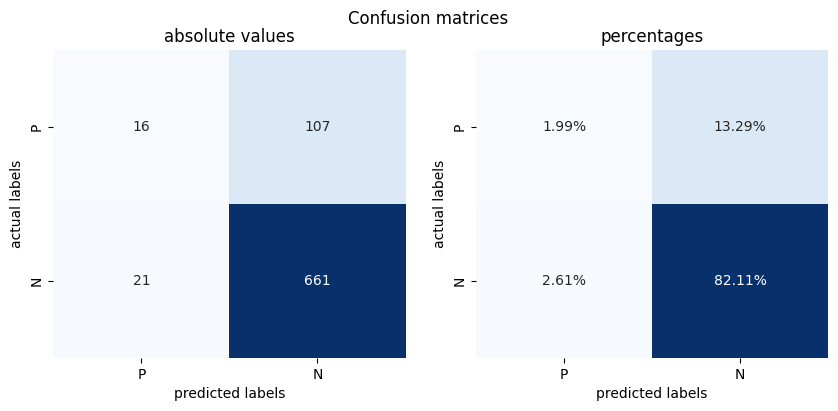

accuracy = 0.8409937888198757
precision = 0.43243243243243246
recall = 0.13008130081300814


In [92]:
display_confusion_matrix(y_test, y_pred)

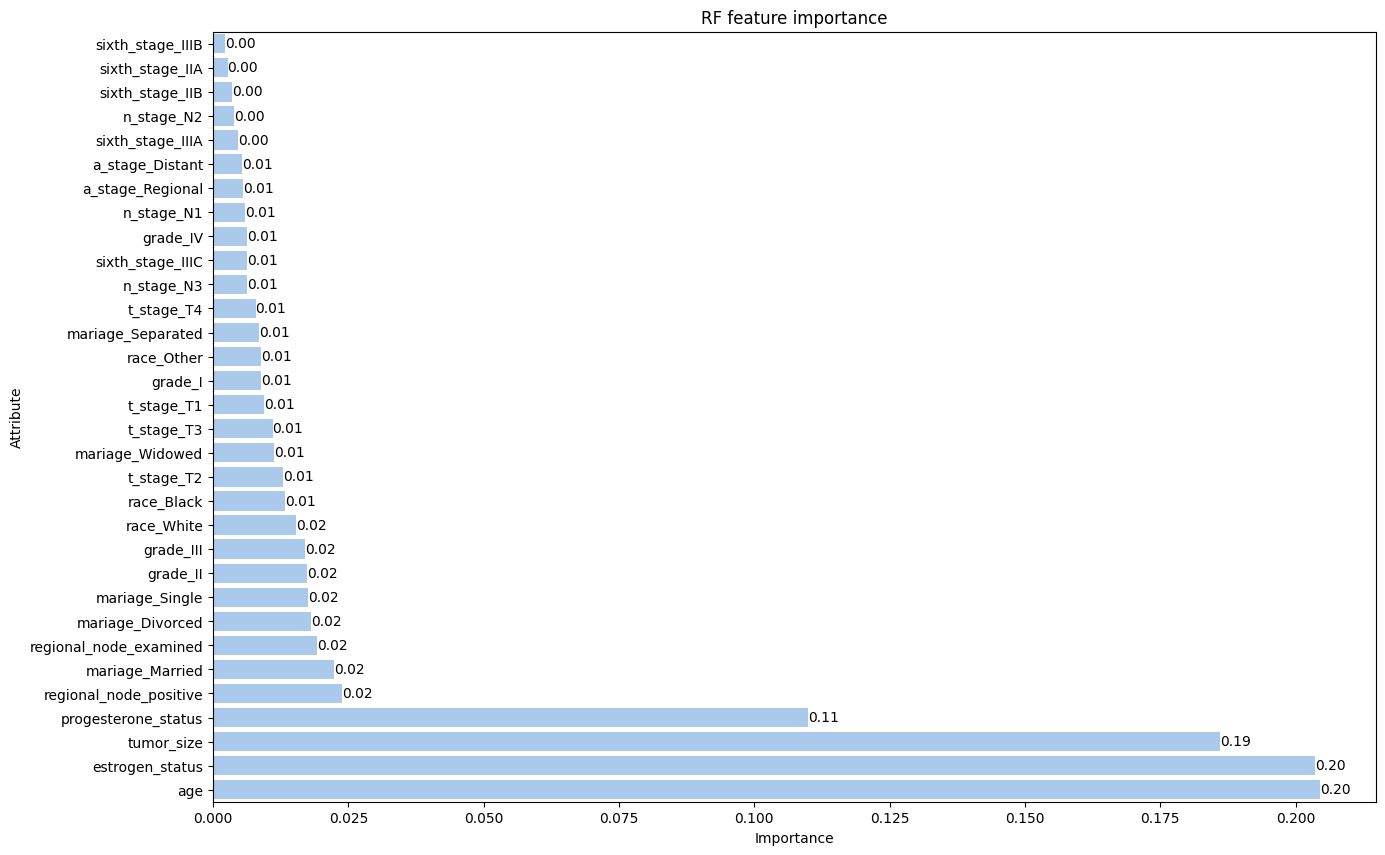

In [93]:
feature_importance = pd.DataFrame(data={
    'Attribute': pd.get_dummies(X_train).columns,
    'Importance': model.named_steps.classification.feature_importances_
})
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.set_color_codes("pastel")
ax = sns.barplot(feature_importance.sort_values(by='Importance'), 
            y='Attribute', 
            x='Importance', 
            color="b",
           )
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')
ax.set_title("RF feature importance")
None